In [2]:
# Importng important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
df = pd.read_excel('/Users/juhimishra/Downloads/Customer_retention_dataset/customer_retention_dataset.xlsx')
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [4]:
print('No of rows :',df.shape[0])
print('No of columns :',df.shape[1])

No of rows : 269
No of columns : 71


In [5]:
# Checking object and integer 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

Almost all the data except pincode is in object form

In [6]:
df.isna().sum().to_frame('Missing numbers')

,Missing numbers
1Gender of respondent,0
2 How old are you?,0
3 Which city do you shop online from?,0
4 What is the Pin Code of where you shop online from?,0
5 Since How Long You are Shopping Online ?,0
6 How many times you have made an online purchase in the past 1 year?,0
7 How do you access the internet while shopping on-line?,0
8 Which device do you use to access the online shopping?,0
9 What is the screen size of your mobile device?\t\t\t\t\t\t,0
10 What is the operating system (OS) of your device?\t\t\t\t,0


In [7]:
df.isna().any().any()

False

No missing values in data

In [8]:
df['1Gender of respondent'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df['1Gender of respondent'].value_counts()

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

Text(0.5, 1.0, 'Gender')

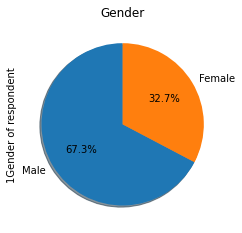

In [10]:
plt.figure(figsize=(8,6))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['1Gender of respondent'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels= df['1Gender of respondent'],
                                                legend = False,ax = ax1,startangle=90, shadow=True,)
plt.title('Gender')

So as we can see that total no Male buyers are more than female buyers . 

Text(0.5, 1.0, 'Age')

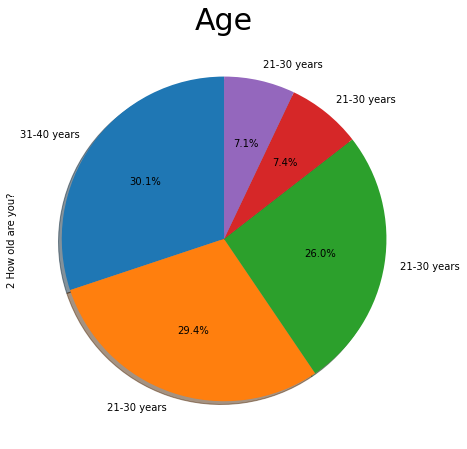

In [11]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['2 How old are you? '].value_counts().plot(kind='pie',autopct='%1.1f%%',labels= df['2 How old are you? '],
                                                legend = False,ax = ax1,startangle=90, shadow=True,)
plt.title('Age',fontsize = 30)

Age group from 20 - 40 years are shopping more

Text(0.5, 1.0, 'Online user in a city')

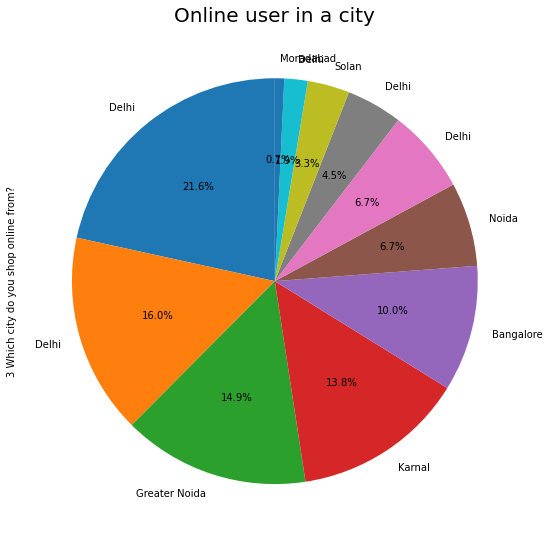

In [12]:
plt.figure(figsize=(20,15))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['3 Which city do you shop online from?'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels= df['3 Which city do you shop online from?'],
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('Online user in a city',fontsize = 20)

NCR is the one where more customer purchase more followed by bNagalore. Which means metropolitian city buyers prefer more to have online shopping

In [13]:
df['3 Which city do you shop online from?'].value_counts()

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

Delhi is the place where mostly people do online shopping ( online shopping is famous mostly in metropolitian city) 

In [14]:
df['4 What is the Pin Code of where you shop online from?'].value_counts()

201308    38
132001    19
201310    18
110044    16
173212     9
250001     9
173229     9
560037     8
132036     8
560010     8
122018     8
110011     7
201306     7
110008     7
110014     6
110018     6
244001     5
201312     5
530068     5
201305     5
201009     5
201008     5
201005     4
201001     4
201304     4
110039     4
110030     4
110009     4
560018     4
560003     4
122009     4
560002     4
110042     4
201303     4
560013     3
203001     2
560001     1
203207     1
203202     1
Name: 4 What is the Pin Code of where you shop online from?, dtype: int64

In [15]:
df.groupby('3 Which city do you shop online from?')['4 What is the Pin Code of where you shop online from?'].value_counts()

3 Which city do you shop online from?  4 What is the Pin Code of where you shop online from?
Bangalore                              560010                                                    8
                                       560037                                                    8
                                       530068                                                    5
                                       560002                                                    4
                                       560003                                                    4
                                       560018                                                    4
                                       560013                                                    3
                                       560001                                                    1
Bulandshahr                            203001                                                    2
Delhi           

In [16]:
df.groupby('1Gender of respondent')['5 Since How Long You are Shopping Online ?'].value_counts()

1Gender of respondent  5 Since How Long You are Shopping Online ?
Female                 Above 4 years                                 72
                       2-3 years                                     43
                       Less than 1 year                              32
                       3-4 years                                     21
                       1-2 years                                     13
Male                   3-4 years                                     26
                       Above 4 years                                 26
                       2-3 years                                     22
                       Less than 1 year                              11
                       1-2 years                                      3
Name: 5 Since How Long You are Shopping Online ?, dtype: int64

Female though we got less count total in number while analyzing gender wise shopping online, But here female customers are more stick to shop online which we can see that more than 4 years no of buyers for female are highest which is 72 while male not even half of female that means consistancy of female are more than male. Same plotted below using count plot for more clarity and have visual insight

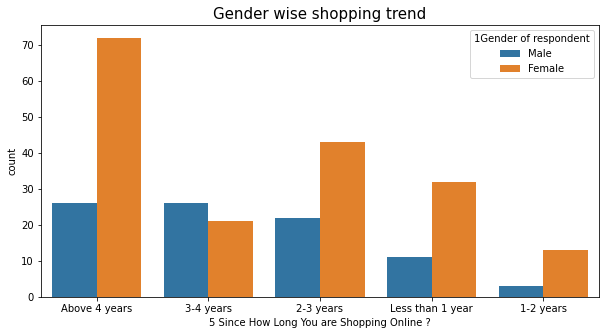

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='5 Since How Long You are Shopping Online ?',hue = '1Gender of respondent',data=df)
plt.title('Gender wise shopping trend', fontsize=15)
plt.show()

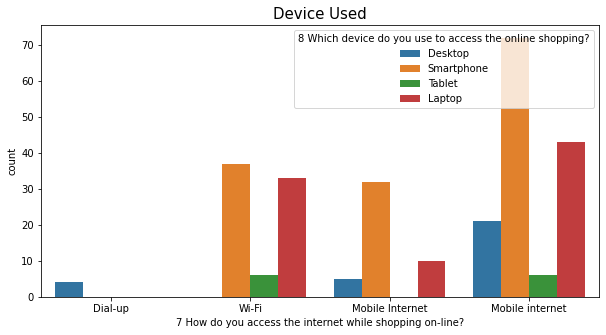

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='7 How do you access the internet while shopping on-line?',
              hue = '8 Which device do you use to access the online shopping?',data=df)
plt.title('Device Used', fontsize=15)
plt.show()

Mostly buyers use mobile internet as most of the customers do use smartphone as a device. 

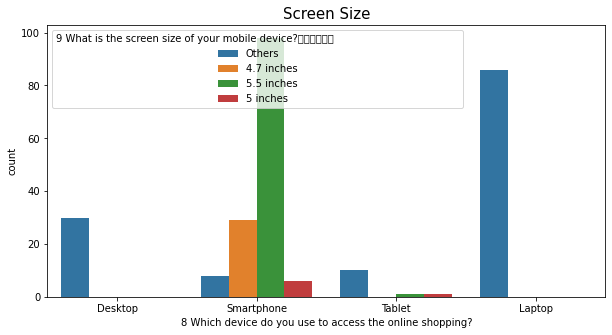

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='8 Which device do you use to access the online shopping?',
              hue = '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',data=df)
plt.title('Screen Size', fontsize=15)
plt.show()

Screen size of mobile matters because picture of the image be more visible to those having large screen and will get more clarity as online shopping main attractive point are images 
by which most of the customers get attracted and purchase the product. Here most of the customers having smartphone uses 5.5 inches screen size which is standard size in the market.

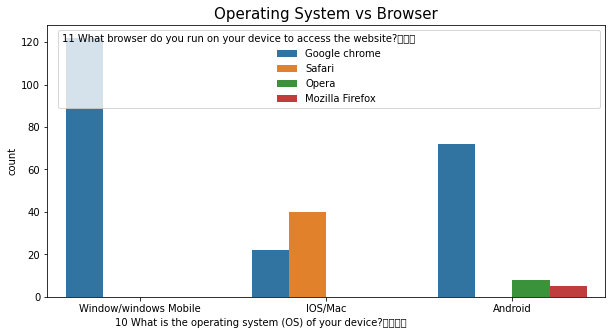

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
              hue = '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
              data=df)
plt.title('Operating System vs Browser', fontsize=15)
plt.show()

Mainly customer uses Google chrome to search any site as we can see that maximum customer are using windows or android for which google chrome are much prefered search engine. Rest using IOS operator using safari which is inbuilt feature of iphone.

In [22]:
df['11 What browser do you run on your device to access the website?\t\t\t                                                          '].value_counts()

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: 11 What browser do you run on your device to access the website?\t\t\t                                                          , dtype: int64

by seeing the table too we got the same insight and it’s a huge number of Google Chorme users compare to any other browser. For safari we can say that only the iOS users can use that search engine as it is an inbuilt feature of iOS only so this may be one of the reason showing less users for safari , as most of the Indian population uses android smartphone and android inbuilt browser is Google Chrome. Mozila Firefox may create issues and not so popular among users now a days same for opera too. 

In [23]:
df['8 Which device do you use to access the online shopping?'].value_counts()

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: 8 Which device do you use to access the online shopping?, dtype: int64

Let’s see no of users for which device are highest and lowest . Here with the help of count we can see that smartphone device being more popular among online shoppers compare to other device . After smartphone Laptop being used mostly. So here we can say that Smartphone are easy to carry and can be used anywhere anytime. While not at all possible in desktop and Tablet is not used for calling purpose so by seeing the need of smartphone which do have almost all the features which a Tablet can do. So tablet is least popular among users.

In [24]:
df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '].value_counts()

Search Engine        230
Content Marketing     20
Display Adverts       19
Name: 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   , dtype: int64

Most channel used by buyers are Search Engine. Rest all are almost negligible. That means most of the focus of all the online company should be on search engine where they can put promos and offers while customer searching for some other product, so that they can get information and can become an activated customer for a company. While investing in content marketing or display adverts are seems to be waste.

<AxesSubplot:xlabel='12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ', ylabel='count'>

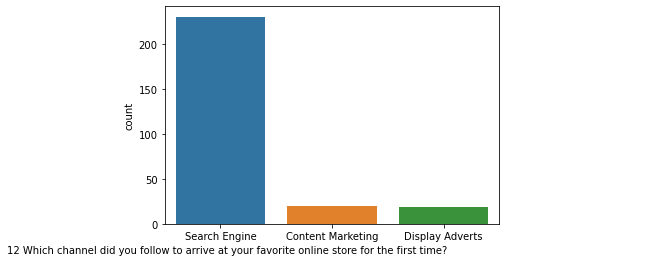

In [25]:
sns.countplot(df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '])

Which we seen above using count plot same here plotted through graph for more clarity. 

<AxesSubplot:xlabel='13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ', ylabel='count'>

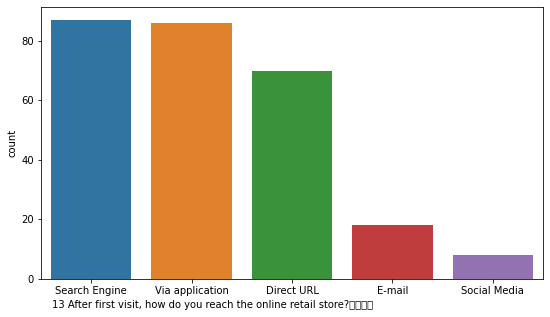

In [26]:
plt.figure(figsize=(9,5))
sns.countplot(df['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '])

Main source to reach online store we can see are search engine which now a days are very popular and easy to search what we want. Also via application are almost as popular as search engine. Nut hre social media are less prefered by anyone to goto ant site.

<AxesSubplot:xlabel='14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ', ylabel='Count'>

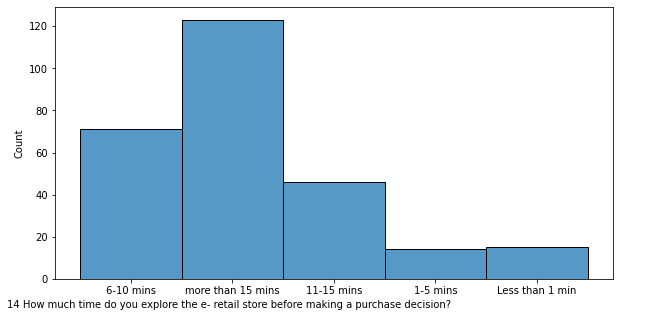

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '])

Mostly buyers do takes more than 15 minutes to make their decision for purchase. Which may be because of customer may explore from their end lot many other things
if searching the particular product or trying to compare from other site too whether they are getting same product in more discount or any offer. This may turn negative for those 
retailers for which customer may be positive but seeing the offer from other site more chance that they may turn to those retailers and here customer churn may take place.

Text(0.5, 1.0, '% of abandon gender wise')

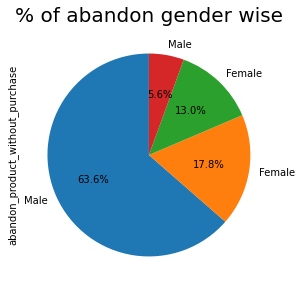

In [30]:
plt.figure(figsize=(10,5))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['abandon_product_without_purchase'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels= df['Gender'],
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('% of abandon gender wise',fontsize = 20)

This happens lot many time that customer do add the product to their bag but abandon the product may be of some reason. Here we can see 
from above piechart that male are abandoning more compare to female. Let's find the reason for the same.

In [7]:
df.rename(columns = {'1Gender of respondent' :'Gender','2 How old are you? ':'Age','3 Which city do you shop online from?':'city_u_shop',
                    '4 What is the Pin Code of where you shop online from?':'Pincode','5 Since How Long You are Shopping Online ?':'time_period_shopping_online',
                    '6 How many times you have made an online purchase in the past 1 year?':'No_of_times_online_purchase',
                    '7 How do you access the internet while shopping on-line?':'mode_of_access_online',
                    '8 Which device do you use to access the online shopping?':'device_used',
                    '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ':'screen_size_of_mobile',
                    '10 What is the operating system (OS) of your device?\t\t\t\t                                          ':'operating_system',
                    '11 What browser do you run on your device to access the website?\t\t\t                                                          ':'browser_used',
                    '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ':'channel_to_arrive_online',
                    '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ':'source_to_reach_online_store',
                    '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ':'explore_e-retil_store',
                    '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ':'preferred_payment_option',
                    '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ':'abandon_product_without_purchase',
                    '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':'reason_to_abandon',
                    '18 The content on the website must be easy to read and understand':'content_easytoread_understand',
                    '19 Information on similar product to the one highlighted  is important for product comparison':'similar_product_highlight_for_comparison',
                    '20 Complete information on listed seller and product being offered is important for purchase decision.':'complete_info_on_listed_seller_andproduct',
                    '21 All relevant information on listed products must be stated clearly':'info_be_clear_on_listed_product',
                    '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'trust_fulfill_transaction_stipulatedtime',
                   '27 Empathy (readiness to assist with queries) towards the customers':'empathy_and_query_solving','28 Being able to guarantee the privacy of the customer':'guarantee_privacy_of_cust',
                   '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'several_channel_communication_for_customer',
                   '30 Online shopping gives monetary benefit and discounts':'benefit_discount_by_online_shopping',
                   '31 Enjoyment is derived from shopping online':'enjoyment_shopping_by_online',
                   '32 Shopping online is convenient and flexible':'convenient_and_flexible',
                   '33 Return and replacement policy of the e-tailer is important for purchase decision':'return_and_replacement_policy',
                   '34 Gaining access to loyalty programs is a benefit of shopping online':'benefit_by_loyalty',
                   '35 Displaying quality Information on the website improves satisfaction of customers':'quality_info_satisfy_customer',
                   '36 User derive satisfaction while shopping on a good quality website or application':'good_quality_satisfaction_for_user',
                   '37 Net Benefit derived from shopping online can lead to users satisfaction':'net_benefit_by_online_shopping_lead_satisfaction',
                   '38 User satisfaction cannot exist without trust':'trust_lead_user_satisfaction',
                   '39 Offering a wide variety of listed product in several category':'offers_wide_variety',
                   '40 Provision of complete and relevant product information':'complete_relevent_info_of_product',
                   '41 Monetary savings':'Monetary_savings',
                   '42 The Convenience of patronizing the online retailer':'Convenience_of_patronizing_the_online_retailer',
                   '43 Shopping on the website gives you the sense of adventure':'online_shopping_gives_sense_of_adventure',
                   '44 Shopping on your preferred e-tailer enhances your social status':'enhance_social_status',
                   '45 You feel gratification shopping on your favorite e-tailer':'gratification_shopping_fav_e-tailer',
                   '46 Shopping on the website helps you fulfill certain roles':'shopping_online_fulfill_vertain_roles',
                   '47 Getting value for money spent':'value_for_money_spent',
                   'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ':'prefered_online_retailers',
                   'Easy to use website or application':'Easy_to_use_website_or_application',
                   'Visual appealing web-page layout':'Visual_appealing_web-page_layout',
                   'Wide variety of product on offer':'Wide_variety_of_product_on_offer',
                   'Complete, relevant description information of products':'complete_info_of_products',
                   'Fast loading website speed of website and application':'Fast_loading_website_speed',
                   'Reliability of the website or application':'reliability_of_website_app',
                   'Quickness to complete purchase':'Quickness_to_complete_purchase',
                   'Availability of several payment options':'several_payment_options',
                   'Speedy order delivery ':'Speedy_order_delivery','Privacy of customers’ information':'Privacy_of_customers_info',
                   'Security of customer financial information':'Security_of_customer_financial_information',
                   'Perceived Trustworthiness':'Perceived_Trustworthiness','Presence of online assistance through multi-channel':'online_assistance_through_multi-channel',
                   'Longer time to get logged in (promotion, sales period)':'time_to_get_logged_in',
                   'Late declaration of price (promotion, sales period)':'delay_in_declaration_in_sales',
                   'Longer page loading time (promotion, sales period)':'delay_in_page_loading',
                   'Limited mode of payment on most products (promotion, sales period)':'limited_mode_of_payment_for_max_product',
                   'Longer delivery period':'Longer_delivery_period','Change in website/Application design':'change_in_website_design',
                   'Frequent disruption when moving from one page to another':'disturbance_moving_from_one_page_to_another',
                   'Website is as efficient as before':'website_efficient_as_before',
                   'Which of the Indian online retailer would you recommend to a friend?':'recommendation_of_online_site_to_friend',
                   '22 Ease of navigation in website':'Ease_of_navigation_in_website',
                   '23 Loading and processing speed':'Loading_and_processing_speed',
                   '24 User friendly Interface of the website':'User_friendly_Interface_of_the_website',
                   '25 Convenient Payment methods':'Convenient_Payment_methods'},inplace=True)

In [8]:
df.rename(columns = {'Longer time in displaying graphics and photos (promotion, sales period)':'time_taking_in_displaying_graphics_photos'},inplace=True)

Renamed columns to make it short and summarised

In [32]:
df.columns

Index(['Gender', 'Age', 'city_u_shop', 'Pincode',
       'time_period_shopping_online', 'No_of_times_online_purchase',
       'mode_of_access_online', 'device_used', 'screen_size_of_mobile',
       'operating_system', 'browser_used', 'channel_to_arrive_online',
       'source_to_reach_online_store', 'explore_e-retil_store',
       'preferred_payment_option', 'abandon_product_without_purchase',
       'reason_to_abandon', 'content_easytoread_understand',
       'similar_product_highlight_for_comparison',
       'complete_info_on_listed_seller_andproduct',
       'info_be_clear_on_listed_product', 'Ease_of_navigation_in_website',
       'Loading_and_processing_speed',
       'User_friendly_Interface_of_the_website', 'Convenient_Payment_methods',
       'trust_fulfill_transaction_stipulatedtime', 'empathy_and_query_solving',
       'guarantee_privacy_of_cust',
       'several_channel_communication_for_customer',
       'benefit_discount_by_online_shopping', 'enjoyment_shopping_by_online',

In [33]:
df.groupby(["reason_to_abandon"],
           as_index=False)['abandon_product_without_purchase'].count()

,reason_to_abandon,abandon_product_without_purchase
0,Better alternative offer,133
1,Change in price,37
2,Lack of trust,31
3,No preferred mode of payment,14
4,Promo code not applicable,54


Here we came across why abandon takes place. Most of the customer given the reason that best alternative offer they got. Which means customer try to purchase best for them with good discount and offer.

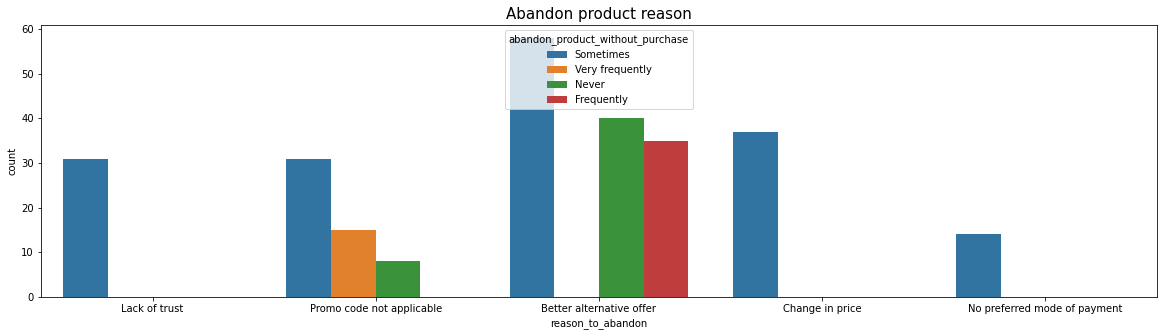

In [34]:
plt.figure(figsize=(20,5))
sns.countplot(x='reason_to_abandon',
              hue = 'abandon_product_without_purchase',data=df)
plt.title('Abandon product reason', fontsize=15)
plt.show()

Reason for abandon represented through visualisation

In [35]:
df["content_easytoread_understand"].value_counts()
         

Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: content_easytoread_understand, dtype: int64

Most of the customer agree to that content should be easier and understandable. This may lead customer to gather more knowledge without any hurdle

Text(0.5, 1.0, 'How Easy the contents are easy to understand for customer')

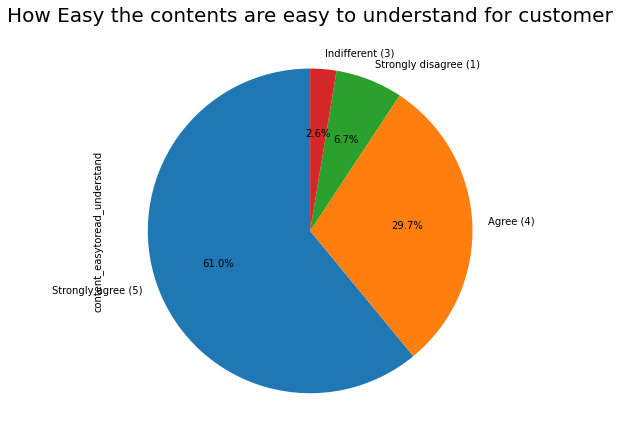

In [36]:
plt.figure(figsize=(16,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['content_easytoread_understand'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('How Easy the contents are easy to understand for customer',fontsize = 20)

Here we can see that 61% of the customer given 5 as rating and approx 30% given 4.

Text(0.5, 1.0, 'How much content is responsible')

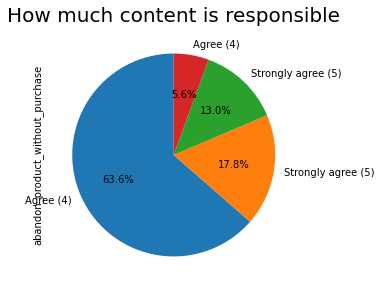

In [37]:
plt.figure(figsize=(10,5))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['abandon_product_without_purchase'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels= df['content_easytoread_understand'],
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('How much content is responsible',fontsize = 20)

From this wanted to know how much content is responsible for abandon of product?
Only 4 and 5 rating being used for this parameter that means customer wants content to be crystal clear.

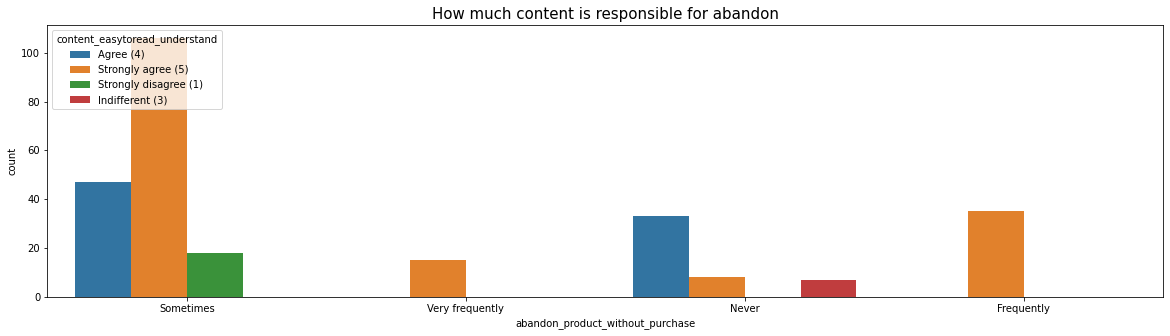

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(x='abandon_product_without_purchase',
              hue = 'content_easytoread_understand',data=df)
plt.title('How much content is responsible for abandon', fontsize=15)
plt.show()

Same has been plotted using count plot

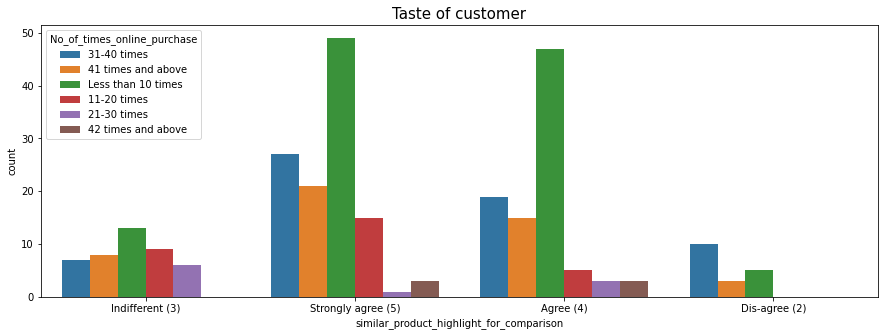

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(x='similar_product_highlight_for_comparison',
              hue = 'No_of_times_online_purchase',data=df)
plt.title('Taste of customer', fontsize=15)
plt.show()

Most of the time buyers search for some alternative features that may be colour, design etc so if get reccomendation of similar product it will be easy for them to compare. And here rating being used 4 and 5 for this parameter.

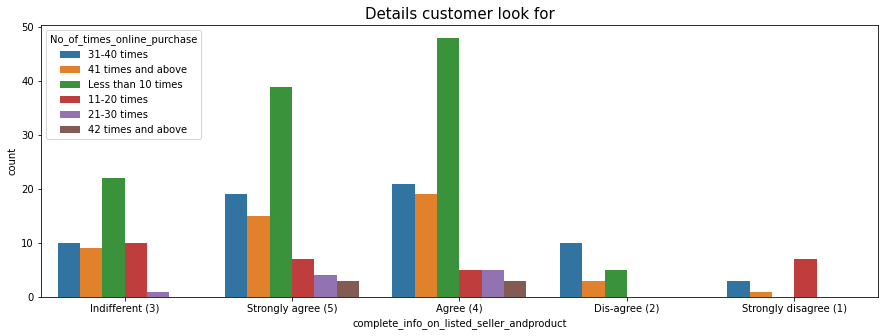

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(x='complete_info_on_listed_seller_andproduct',
              hue = 'No_of_times_online_purchase',data=df)
plt.title('Details customer look for', fontsize=15)
plt.show()

Complete information of listed seller and product should be mandatory as online shopping completely depends upon trust. 
If buyers will have complete info about seller from whom they are purchasing, they may be able to trust and proceed for shopping from that seller.

In [41]:
df.groupby(['No_of_times_online_purchase'],as_index=False)['Ease_of_navigation_in_website'].count()
           

,No_of_times_online_purchase,Ease_of_navigation_in_website
0,11-20 times,29
1,21-30 times,10
2,31-40 times,63
3,41 times and above,47
4,42 times and above,6
5,Less than 10 times,114


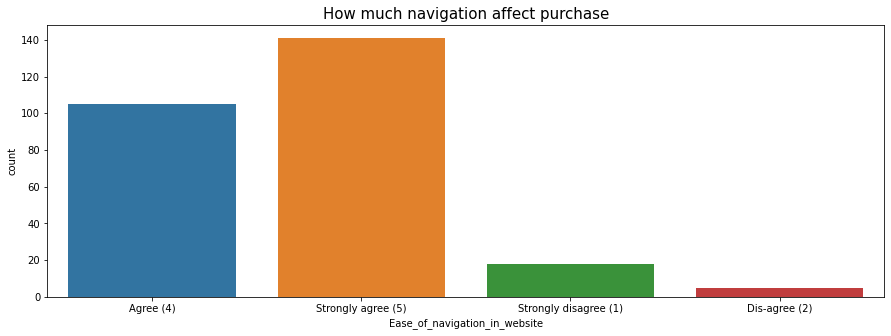

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x='Ease_of_navigation_in_website'
              ,data=df)
plt.title('How much navigation affect purchase', fontsize=15)
plt.show()

for ease of navigation too most of the customer given as 4 and 5. 

In [43]:
df['Ease_of_navigation_in_website'].value_counts()

Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: Ease_of_navigation_in_website, dtype: int64

Text(0.5, 1.0, '% of easy navigation')

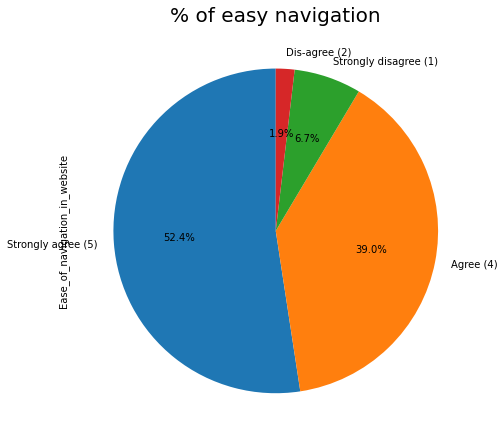

In [44]:
plt.figure(figsize=(16,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['Ease_of_navigation_in_website'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('% of easy navigation',fontsize = 20)

Here with the help of pie chart we can see that most of the buyers strongly agree to have ease of navigation so that location issue will not become hurdle for online buyers.

In [45]:
df['Loading_and_processing_speed'].value_counts()

Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Strongly disagree (1)     12
Indifferent (3)           12
Name: Loading_and_processing_speed, dtype: int64

Here most of the population giving rate 4 and 5 for this parameter that means they do agree that loading and processing speed should not be a hurdle

Text(0.5, 1.0, '% of loading speed matters')

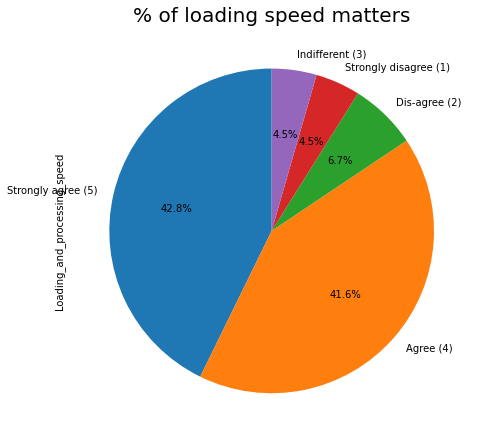

In [46]:
plt.figure(figsize=(16,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['Loading_and_processing_speed'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('% of loading speed matters',fontsize = 20)

42.8% strongly agree to this and even agree that means rating given 4 to this parameter are also high which shows that an online business should work on this if they don’t have good loading speed or have any issue with page opening , even sometimes during payment this condition may take place which leads customer trust to be on risk.

In [47]:
df['User_friendly_Interface_of_the_website'].value_counts()

Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: User_friendly_Interface_of_the_website, dtype: int64

again we can see that most of the users given rating 4 and 5 for website interface should be user friendly

In [48]:
df['Convenient_Payment_methods'].value_counts()

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: Convenient_Payment_methods, dtype: int64

Here also mostly rating used are 4 and 5 for convinient payments methods

In [49]:
df['trust_fulfill_transaction_stipulatedtime'].value_counts()

Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: trust_fulfill_transaction_stipulatedtime, dtype: int64

<AxesSubplot:xlabel='trust_fulfill_transaction_stipulatedtime', ylabel='count'>

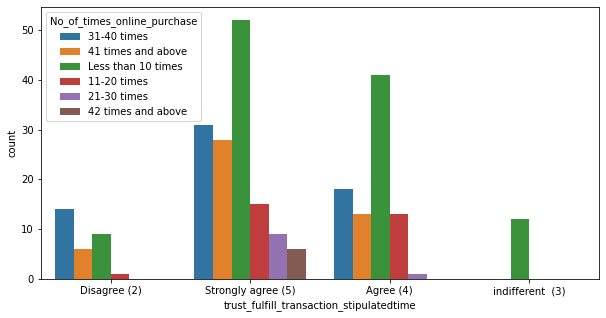

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'trust_fulfill_transaction_stipulatedtime',hue = 'No_of_times_online_purchase',data=df)

Trust is one of the most important factor in any of the business and specially for online business as this business is such where we can’t  meet face to face to the retailers or can’t see the product physically. Completely need to rely on what photos are provided by retailer on site and what description they given for the same, also payment method is one of the most important factor where consumer may have trust issues . One of the factor is return and refund policy which should be clearly mentioned and should be processed on time as given. This may lead to gain trust of consumers and can have shopping without any confusion. Same shown using plot for more clarity.

In [51]:
df['empathy_and_query_solving'].value_counts()

Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: empathy_and_query_solving, dtype: int64

One of the factor that has been given in survey was empathy and query solving which can even change negative customer to positive if the query being solved in time and empathy is the way of showing gesture that you care for your customer which really sometimes proven to be most effective way of retaining customer . And as known that mostly rating given is 4 and 5 for this parameter too. 

Text(0.5, 1.0, '% of guarantee of privacy of customer')

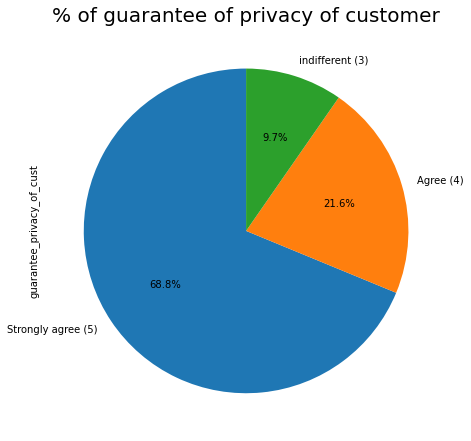

In [52]:
plt.figure(figsize=(16,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['guarantee_privacy_of_cust'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('% of guarantee of privacy of customer',fontsize = 20)

Keeping privacy each information of customer are really important as these are the personal information which should not be leaked anyhow. If company fails to do so it will not only affect them of loosing customer but will also hamper customer as they give most of the personal information on site while shopping which can be misused by someone and they may be trapped in some problem. And mostly rating also we can see is being gave 5 for this

Text(0.5, 1.0, '% Channel to Communicate')

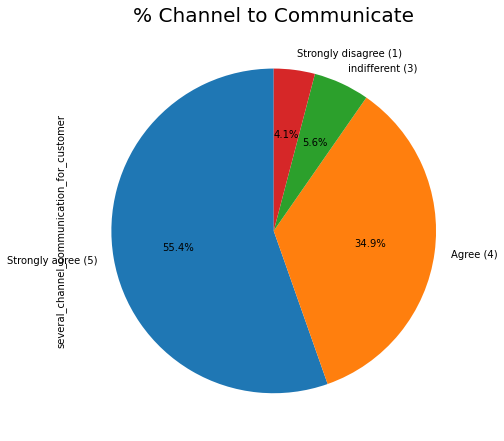

In [53]:
plt.figure(figsize=(16,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['several_channel_communication_for_customer'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('% Channel to Communicate',fontsize = 20)

Online retailers should have the facility of multi channel communication as single or bi channel communication may create an issue for customer and may be they won’t reach to the company to resolve their query on time which may again lead to customer attrition, so to curb this online retailer channels should focus to have several channel to communicate.

Text(0.5, 1.0, 'online shopping benifit')

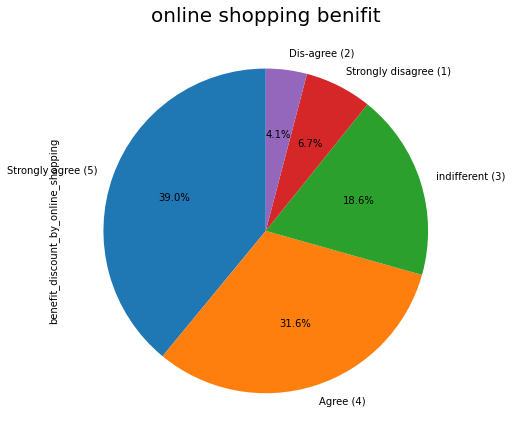

In [54]:
plt.figure(figsize=(16,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['benefit_discount_by_online_shopping'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('online shopping benifit',fontsize = 20)

Most of the time online shopping being proven to be more beneficial than going to shop as promos or offer are being given by most of the site to attract customer so that they can come again again to shop.  So here even online shoppers for which survey been done randomly agree to this that are getting more benefit from online shopping

Text(0.5, 1.0, 'online shopping happiness')

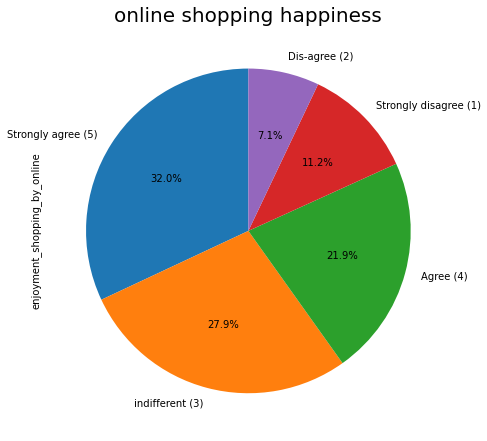

In [55]:
plt.figure(figsize=(16,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['enjoyment_shopping_by_online'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('online shopping happiness',fontsize = 20)

As maximum number of customer do agree that online shopping gives them a sort of happiness. But even there are rating given 3 also nearby to rating 5 which means there are mixed view of every customer.

Text(0.5, 1.0, 'Online Shopping convinient and flexible')

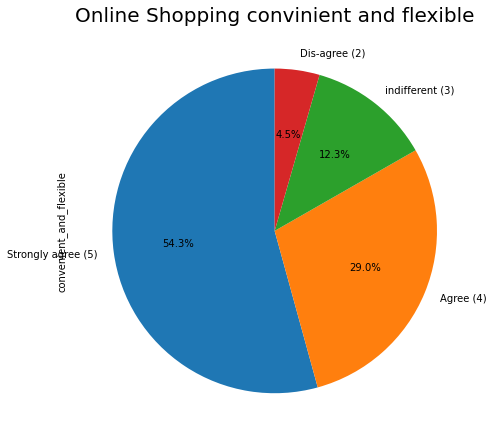

In [56]:
plt.figure(figsize=(16,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['convenient_and_flexible'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('Online Shopping convinient and flexible',fontsize = 20)

Most of the customer given 5 rating that means most of them agree that online shopping is convenient and flexible for them as they don’t have to plan prior and have to travel for the same for each and every shopping. As Online shopping can be done anywhere everywhere and no travel time , that means it not only saves time of shoppers but also give them multiple choices from maximum retailers.

Text(0.5, 1.0, 'How good in Return and Replacement Policy')

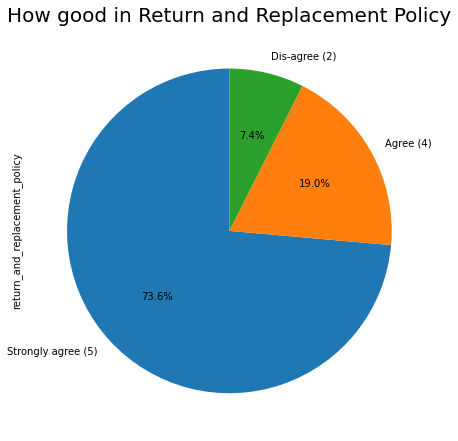

In [57]:
plt.figure(figsize=(16,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['return_and_replacement_policy'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('How good in Return and Replacement Policy',fontsize = 20)

An online shopping market should always have easy return and replacement policy so that customer should not face any issue and can have more trust on online shopping. This is also one of the important aspect from business point of view And as we can see that almost 73% do agree to this.

Text(0.5, 1.0, '% of loyalty benefitting in improving purchase')

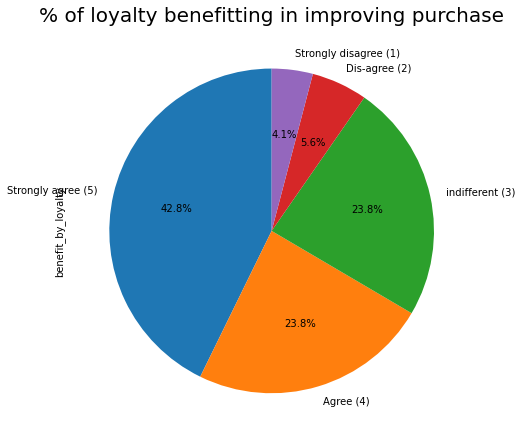

In [58]:
plt.figure(figsize=(16,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['benefit_by_loyalty'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('% of loyalty benefitting in improving purchase',fontsize = 20)

As we are getting the insight from maximum parameters that gaining trust, maintaining security, loyalty are the important key for any of the business to get success. In which online really have to maintain this as I said prior that this is not face to face shopping, customer don’t know any of the retailers by their face or outlet so maintaining loyalty towards customer by online retailers gets doubled. Here even with the help of survey we can see that max rating being used by shoppers are 3,4 and 5, Which means they agree to this strongly. 

Text(0.5, 1.0, '% of quality benefitting in improving purchase')

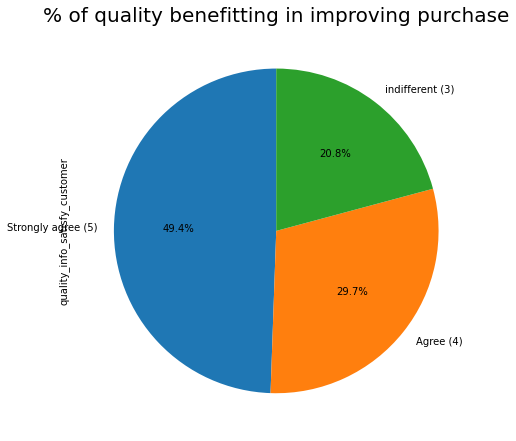

In [59]:
plt.figure(figsize=(16,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['quality_info_satisfy_customer'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('% of quality benefitting in improving purchase',fontsize = 20)

Maintaining quality of product is one of the important factor.If quality will be good and once customer get satisfied definitely for the next time they will try to shop more even will recommend to their friends and family, which may generate new customer for business. And even we can see that almost 70% of the customer agree to this in which 49% had given rating 5 and approx 30% had given rating 4 for this. 

Text(0.5, 1.0, '% of good quality satisfaction benefitting in improving purchase')

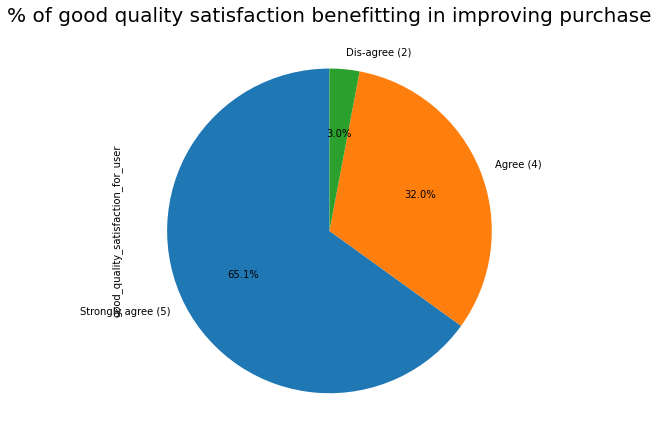

In [60]:
plt.figure(figsize=(16,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['good_quality_satisfaction_for_user'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)
plt.title('% of good quality satisfaction benefitting in improving purchase',fontsize = 20)

Here also we can see that almost 97% customer agree to this and given 4 and 5 rating for this parameter. Which means quality really matters a lot for customer.

Text(0.5, 1.0, '% of satisfaction by net benefit')

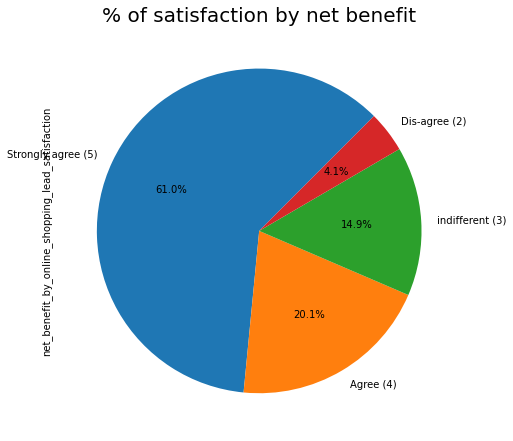

In [61]:
plt.figure(figsize=(16,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['net_benefit_by_online_shopping_lead_satisfaction'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=False,)
plt.title('% of satisfaction by net benefit',fontsize = 20)

Here also we can see that almost 97% customer agree to this and given 4 and 5 rating for this parameter. Which means quality really matters a lot for customer.

Text(0.5, 1.0, '% of agree on Trust for user satisfaction')

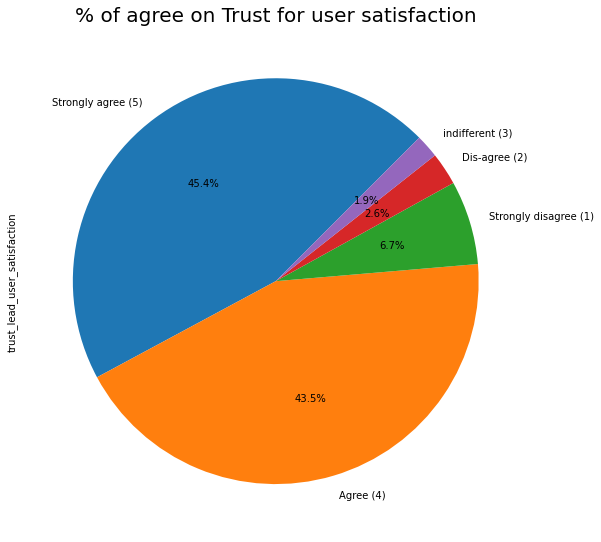

In [62]:
plt.figure(figsize=(20,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['trust_lead_user_satisfaction'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=False,)
plt.title('% of agree on Trust for user satisfaction',fontsize = 20)

Here net benefit means overall benefit gained by online shopping. That means Quality, Quantity, service, payment option, return and replacement policy etc. These are the certain parameters which gives net benefit for buyers. And here almost 80% of the customer agree to this as per the survey done and review taken from them. 

Text(0.5, 1.0, 'Wide variety offer by online retailers')

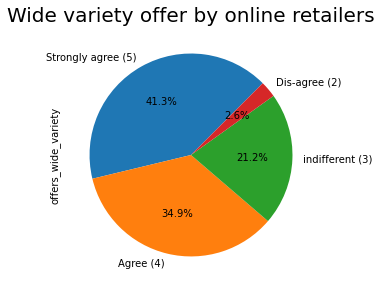

In [63]:
plt.figure(figsize=(10,6))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['offers_wide_variety'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=False,)
plt.title('Wide variety offer by online retailers',fontsize = 20)

More the variety more will get the option to choose from. And as in online there are not only one retailer involved , it’s a bunch of retailers listed on site. So the option to choose products become more convenient as lot many varieties offered by different retailers and without going anywhere we can shop what we want even from other city too. 

Text(0.5, 1.0, 'Relevent Information on product')

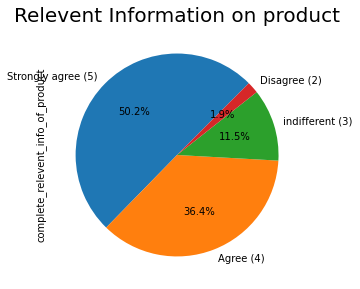

In [64]:
plt.figure(figsize=(10,5))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['complete_relevent_info_of_product'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=False,)
plt.title('Relevent Information on product',fontsize = 20)

Here with the help of pie chart we can see that most of the rating being given as 4 and 5 for information of product should be relevant that means should not be different from what given on site and what getting after delivery. If the information will be crystal clear consumer will have trust on that particular site and there are more chances that they may convert to regular customer and can even refer to their friends and family.

Text(0.5, 1.0, 'Savings by doing online shopping')

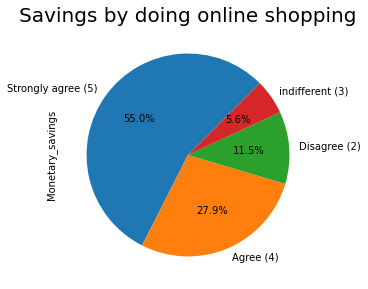

In [10]:
plt.figure(figsize=(10,5))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['Monetary_savings'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=False,)
plt.title('Savings by doing online shopping',fontsize = 20)

Online shopping not only saves time but also money in every aspect.  Very first thing we don’t have to go anywhere so travel cost saved then mostly promos and offers being offered by different retailers which also having good profit for online shoppers as in outlet may be possible that if we purchase in bulk then only get some discount but here quantity doesn’t matter. And as expected we can see that rating being used maximum 4 and 5 for this parameter. That means most of the reviewers agree to this. 

<AxesSubplot:ylabel='Convenience_of_patronizing_the_online_retailer'>

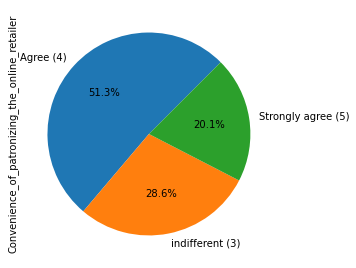

In [66]:
plt.figure(figsize=(10,5))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['Convenience_of_patronizing_the_online_retailer'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=False,)


Here buyers are having that convenience to choose their retailers and may add to their bag to whom they want to give more priority, means no restriction to purchase from one or two of the retailers only and they may have variety of options from where they can purchase and here I got the insight that only 3 ratings being used by shoppers i.e., 3, 4 and 5 which means most of the customer agree to this.

<AxesSubplot:ylabel='online_shopping_gives_sense_of_adventure'>

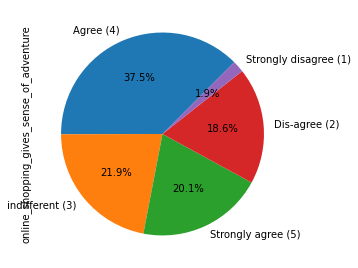

In [67]:
plt.figure(figsize=(10,5))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['online_shopping_gives_sense_of_adventure'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=False,)


mostly the rating used for this is 4 that means most of the customer do agree to this that online shopping gives adventures feelings.

<AxesSubplot:ylabel='enhance_social_status'>

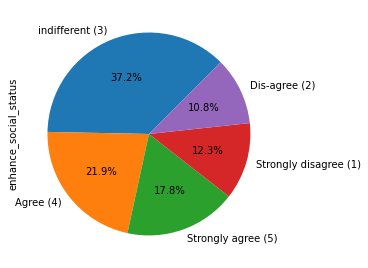

In [68]:
plt.figure(figsize=(10,5))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['enhance_social_status'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=False,)


As we can see with the help of piechart that most of the rating used for this parameter is 3 and 4 which means few agree to this that online shopping enhances social status while most of the customers are there who partially agree and given rating as 3.

<AxesSubplot:ylabel='gratification_shopping_fav_e-tailer'>

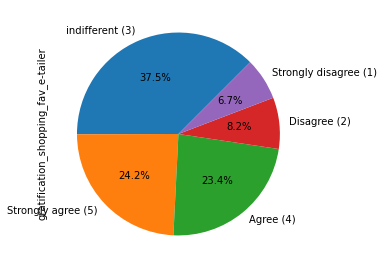

In [69]:
plt.figure(figsize=(10,5))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['gratification_shopping_fav_e-tailer'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=False,)


as we can see that rating 5 been given by approx 24% of the customer and 4 by 23% . But here we can see that most used rating is 3 that means neither customer do agree to this nor disagree depends upon situation and service they provide.

<AxesSubplot:ylabel='shopping_online_fulfill_vertain_roles'>

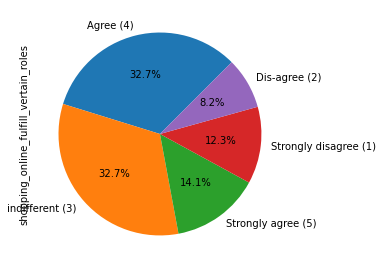

In [70]:
plt.figure(figsize=(10,5))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['shopping_online_fulfill_vertain_roles'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=False,)


For this parameter we can see that maximum rating being given as 3 and 4 that means very less are there who strongly agree to that online shopping fulfils certain roles.

<AxesSubplot:ylabel='value_for_money_spent'>

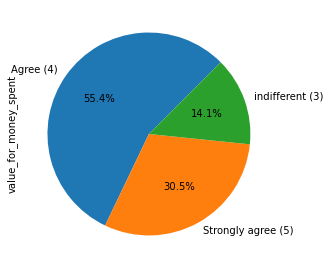

In [71]:
plt.figure(figsize=(10,5))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['value_for_money_spent'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=False,)


Most of the rating being used as 4 and 5 and very less rating been given as 3 for the parameter value for money spent. So from this insight we came across that most of the customers do agree that spending money online are worth. This we can say because none has given rating 1 and 2 which means strongly disagree. Ultimately shoppers are agreeing to that, online shopping is not a complete loss for them if they improve few of the parameters which being rated 1 and 2 by finding proper reason and if possible can resolve.

<AxesSubplot:ylabel='prefered_online_retailers'>

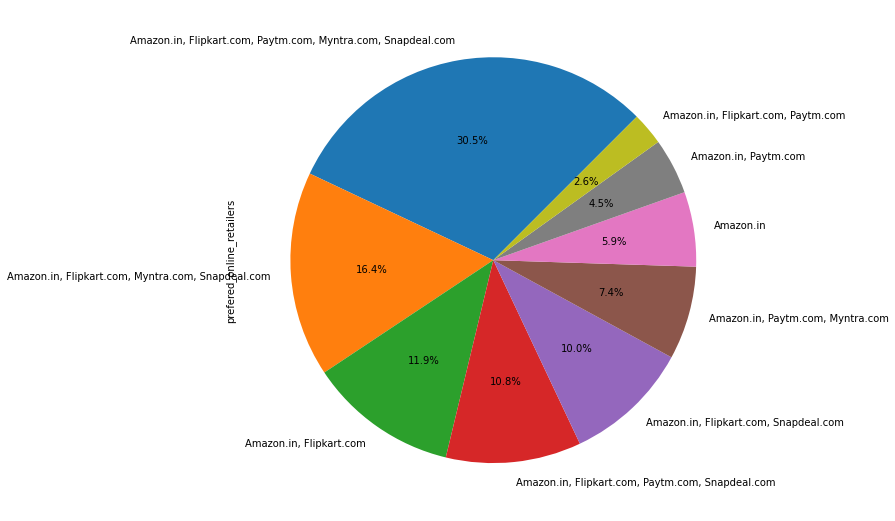

In [72]:
plt.figure(figsize=(20,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['prefered_online_retailers'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=False,)


From pie graph also we can see that 30.5 % of customer being shopping from different sites depending upon their requirement. Only amazon is such where approx 6% of customer purchase for that particular site. Else we can see the mixed site being used every time. With this I can say that amazon is the one which is a preferred online retailers for at least few of the customer.

In [73]:
df['prefered_online_retailers'].value_counts()

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: prefered_online_retailers, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

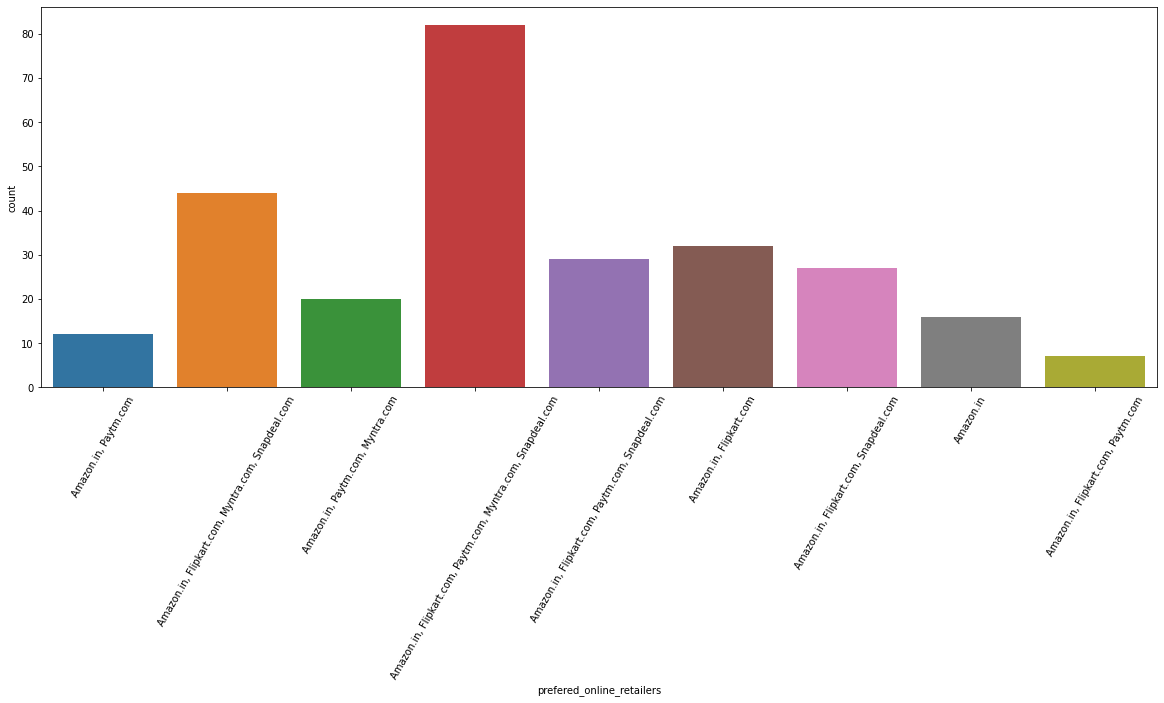

In [74]:
plt.figure(figsize=(20,7))
sns.countplot(df['prefered_online_retailers'])
plt.xticks(rotation=60)

<AxesSubplot:ylabel='Easy_to_use_website_or_application'>

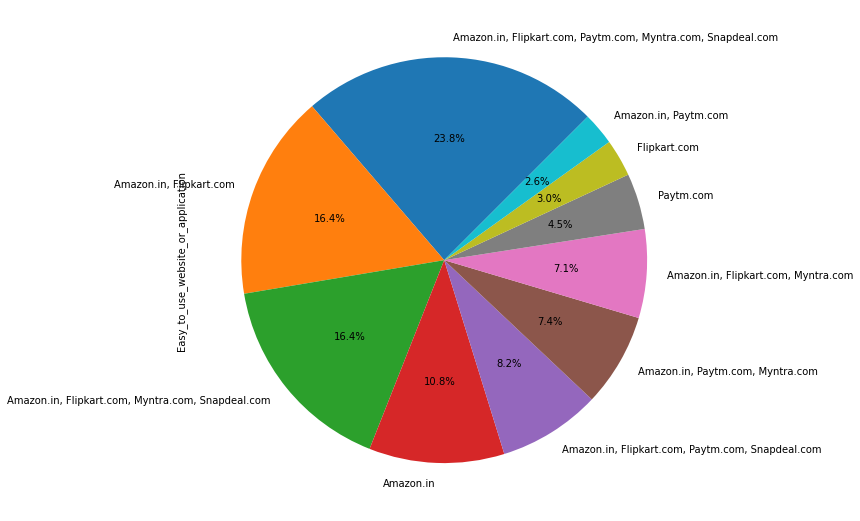

In [75]:
plt.figure(figsize=(20,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['Easy_to_use_website_or_application'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=False,)


In [76]:
df['Easy_to_use_website_or_application'].value_counts()

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com                                         44
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy_to_use_website_or_application, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Myntra.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Paytm.com'),
  Text(9, 0, 'Flipkart.com')])

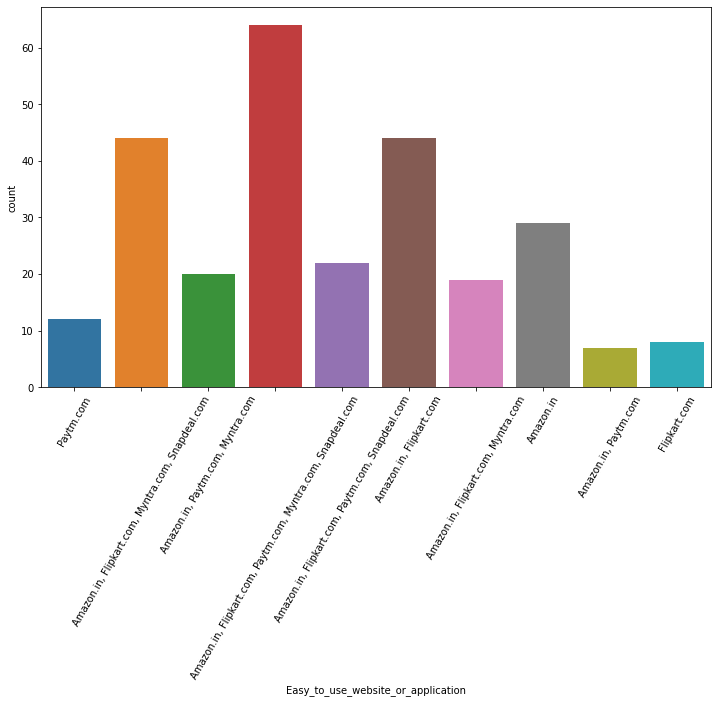

In [77]:
plt.figure(figsize=(12,7))
sns.countplot(df['Easy_to_use_website_or_application'])
plt.xticks(rotation=60)

Here with the help of count plot we can see that most of the users said that almost all the site are same in using application or website. But till the weightage by some of the customer being given to amazon.in which is highest followed by paytm and Flipkart. This means these three websites are easy to handle by few of the customers. 

In [78]:
df['Visual_appealing_web-page_layout'].value_counts()

Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Flipkart.com, Myntra.com                                        15
Amazon.in, Myntra.com                                           15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visual_appealing_web-page_layout, dtype: int64

<AxesSubplot:ylabel='Visual_appealing_web-page_layout'>

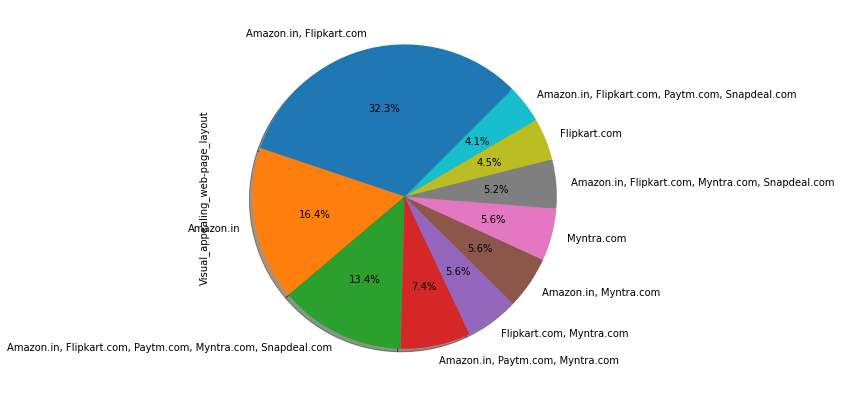

In [79]:
plt.figure(figsize=(15,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['Visual_appealing_web-page_layout'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=True,)


Here in the piechart we can see that individually users rated mostly to amazon as the most catchy visual appearance web page layout as we can see that 32% being given to both Flipkart and amazon in which amazon itself having 16% while Flipkart do have only 4% that means amazon is more famous and presentable compare to other online retailers.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Amazon.in, Myntra.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Myntra.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(8, 0, 'Flipkart.com, Myntra.com'),
  Text(9, 0, 'Amazon.in')])

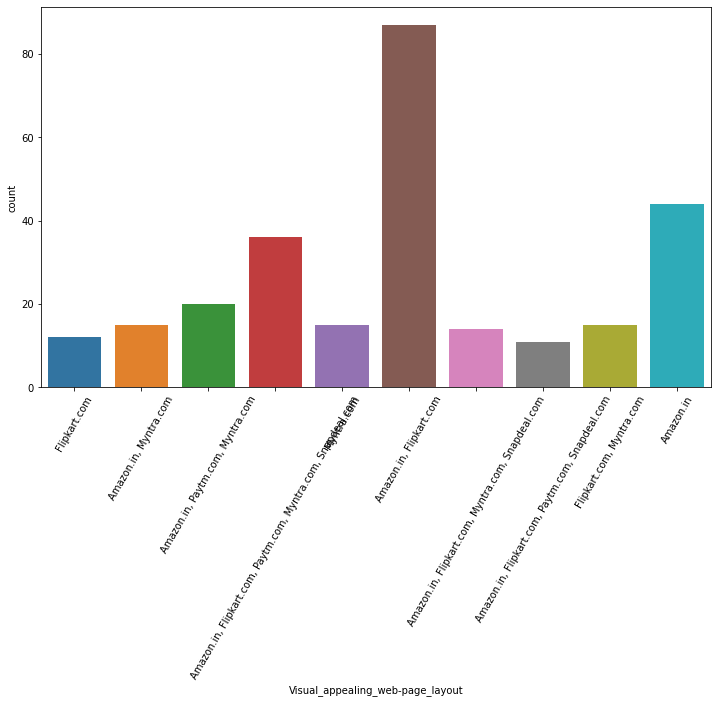

In [80]:
plt.figure(figsize=(12,7))
sns.countplot(df['Visual_appealing_web-page_layout'])
plt.xticks(rotation=60)

In [81]:
df['Wild variety of product on offer'].value_counts()

Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Wild variety of product on offer, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Flipkart.com, Myntra.com'),
  Text(2, 0, 'Amazon.in, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com'),
  Text(4, 0, 'Myntra.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(6, 0, 'Amazon.in'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(8, 0, 'Paytm.com')])

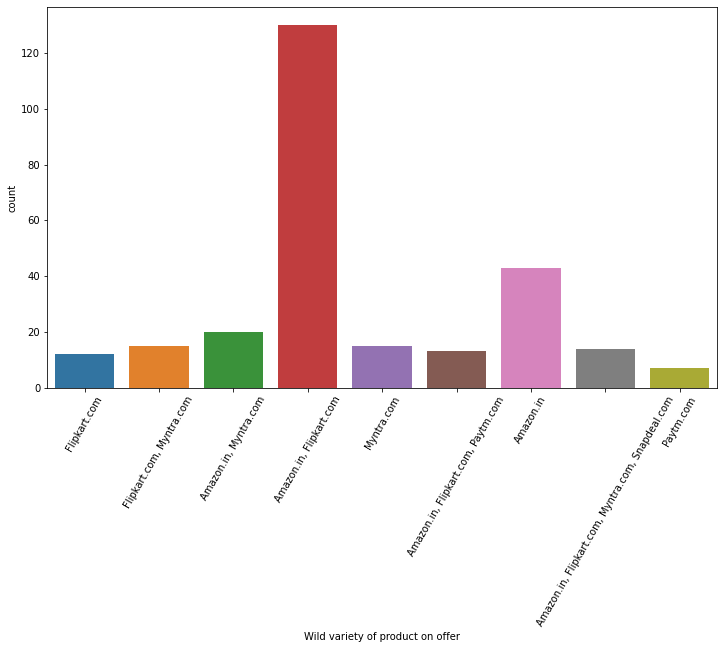

In [82]:
plt.figure(figsize=(12,7))
sns.countplot(df['Wild variety of product on offer'])
plt.xticks(rotation=60)

<AxesSubplot:ylabel='Wild variety of product on offer'>

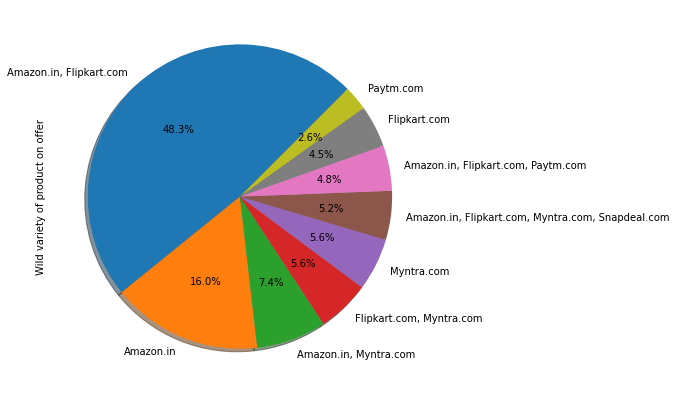

In [83]:
plt.figure(figsize=(15,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['Wild variety of product on offer'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=True,)


Most of online shoppers given higher rating to amazon and Flipkart i.e., approx 48% for having wide variety of product on offer. While again amazon is leading in this with 16% . So every online retailers should have glance that what the offer one site is bringing to customer that 16% of them moving towards that particular site. 

In [84]:
df['complete_info_of_products'].value_counts()

Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: complete_info_of_products, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Snapdeal.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(6, 0, 'Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(8, 0, 'Amazon.in'),
  Text(9, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(10, 0, 'Flipkart.com')])

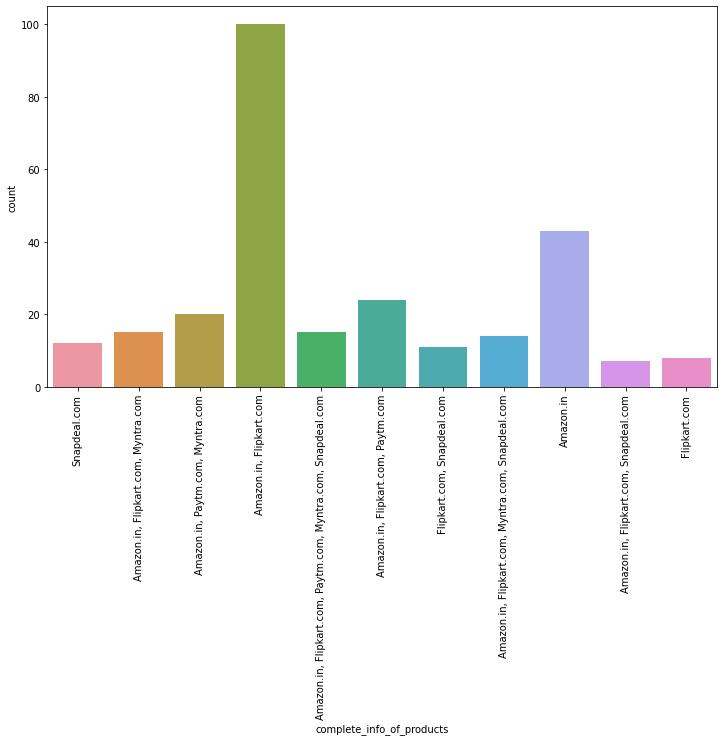

In [85]:
plt.figure(figsize=(12,7))
sns.countplot(df['complete_info_of_products'])
plt.xticks(rotation=90)

<AxesSubplot:ylabel='complete_info_of_products'>

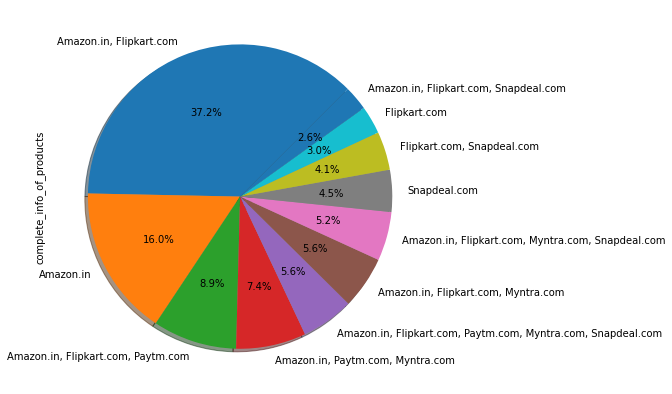

In [86]:
plt.figure(figsize=(15,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['complete_info_of_products'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=True,)


amazon as an individual website is a leading website with 16% agreed customers who says that amazon do have complete information related to product. Here we can say that in most of the parameters customer choice is amazon even though it’s 16% but compare to others amazon is having higher no of customer independently without mixup with other sites. That means these many customers are having probability most of the time they will buy from this site. 

<AxesSubplot:ylabel='Fast_loading_website_speed'>

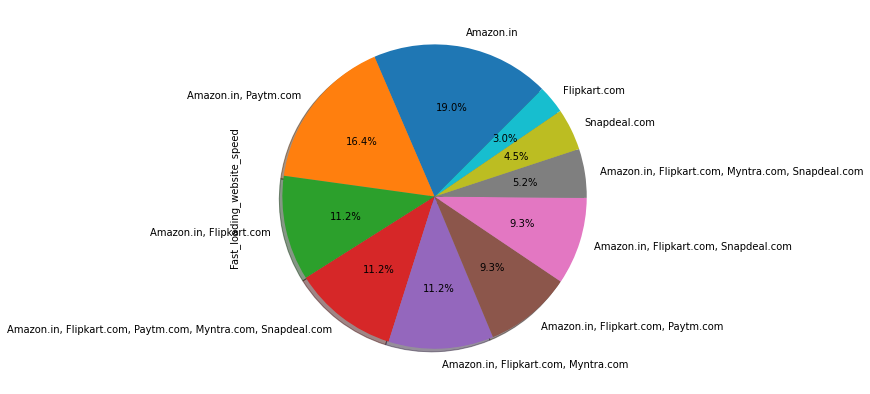

In [87]:
plt.figure(figsize=(15,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['Fast_loading_website_speed'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=True,)


Here I want to get the insight of which site is having fast loading website speed as per users. And in review come across that Amazon is the one who is having highest vote for having fast loading site compare to others . 

In [90]:
df['reliability_of_website_app'].value_counts()

Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Flipkart.com                                         15
Myntra.com                                           15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: reliability_of_website_app, dtype: int64

<AxesSubplot:ylabel='reliability_of_website_app'>

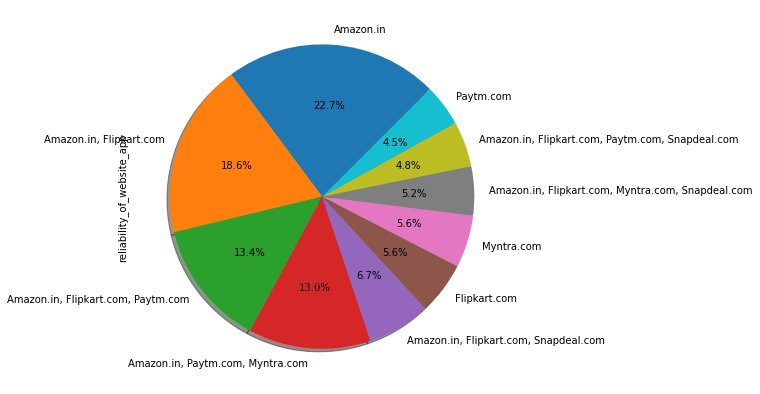

In [89]:
plt.figure(figsize=(15,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['reliability_of_website_app'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=True,)


Here in the above pie chart we can see individually amazon is having approx 23% which means good amount of customer who believes that this site is more reliable site for shopping followed by combination of amazon and Flipkart where they are having together 18.6% who believes to shop from these sites. Rest of the site likewise Myntra Flipkart and paytm do have almost same number of customer who believes in these sites individually.

In [92]:
df['Quickness_to_complete_purchase'].value_counts()

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com                                                 15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness_to_complete_purchase, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Paytm.com'),
  Text(1, 0, 'Amazon.com, Flipkart.com, Myntra.com'),
  Text(2, 0, 'Amazon.com, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.com, Flipkart.com, Paytm.com'),
  Text(4, 0, 'Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal'),
  Text(5, 0, 'Amazon.com'),
  Text(6, 0, 'Flipkart.com, Myntra.com, Snapdeal'),
  Text(7, 0, 'Amazon.com, Flipkart.com'),
  Text(8, 0, 'Flipkart.com')])

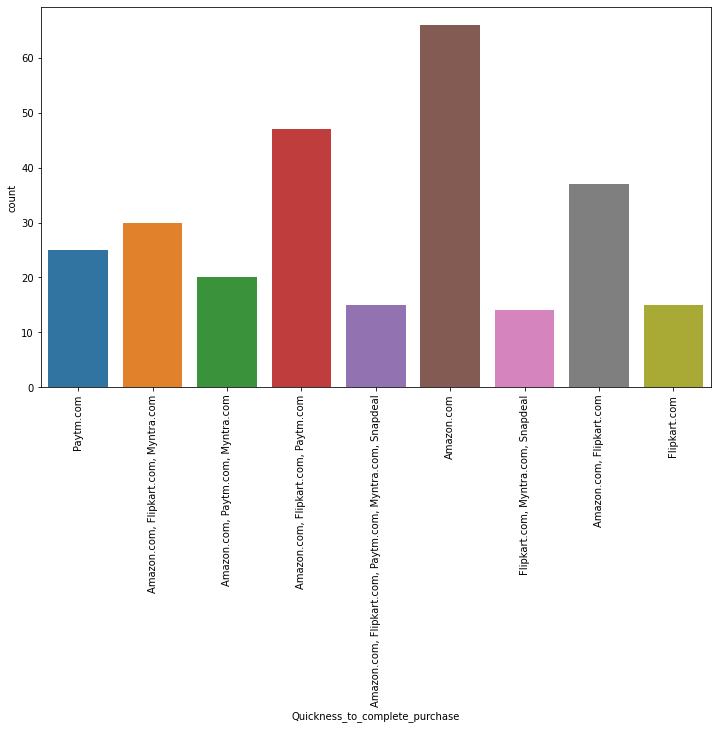

In [93]:
plt.figure(figsize=(12,7))
sns.countplot(df['Quickness_to_complete_purchase'])
plt.xticks(rotation=90)

<AxesSubplot:ylabel='Quickness_to_complete_purchase'>

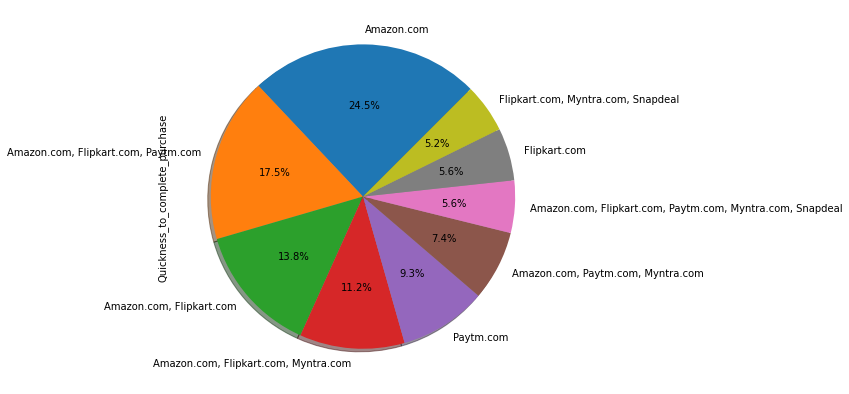

In [94]:
plt.figure(figsize=(15,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['Quickness_to_complete_purchase'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=True,)


Here again 24.5% of the customer believes that amazon do have good service in this parameter too.

In [95]:
df['several_payment_options'].value_counts()

Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: several_payment_options, dtype: int64

<AxesSubplot:ylabel='several_payment_options'>

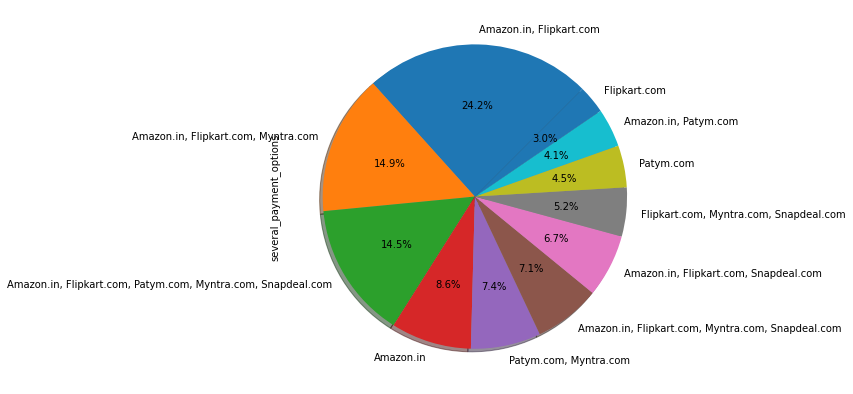

In [96]:
plt.figure(figsize=(15,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['several_payment_options'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=True,)


Here almost all the online site got same weightage for payment option. That means customer believes that most of the site are giving almost same service for payment option. In this combination of amazon and Flipkart are having higher % which is 24.2% 

In [97]:
df['Speedy_order_delivery'].value_counts()

Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Flipkart.com                               15
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Speedy_order_delivery, dtype: int64

<AxesSubplot:ylabel='Speedy_order_delivery'>

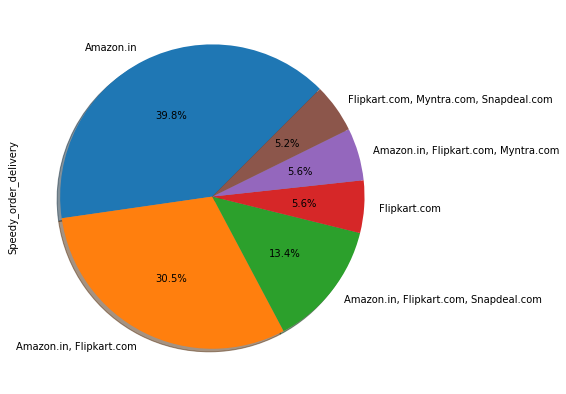

In [98]:
plt.figure(figsize=(15,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['Speedy_order_delivery'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=True,)


How fast the order being delivered matters for the customer. Faster the delivery more the customer trust and willingness to purchase will increase. Here again amazon is having good service for delivery as we can see no of customers who agree to this are maximum for amazon site with approx 40%. Followed by combination of amazon and Flipkart which is having 30.5% of users agrees that order delivery are faster compare to other website.

In [99]:
df['Privacy_of_customers_info'].value_counts()

Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy_of_customers_info, dtype: int64

<AxesSubplot:ylabel='Privacy_of_customers_info'>

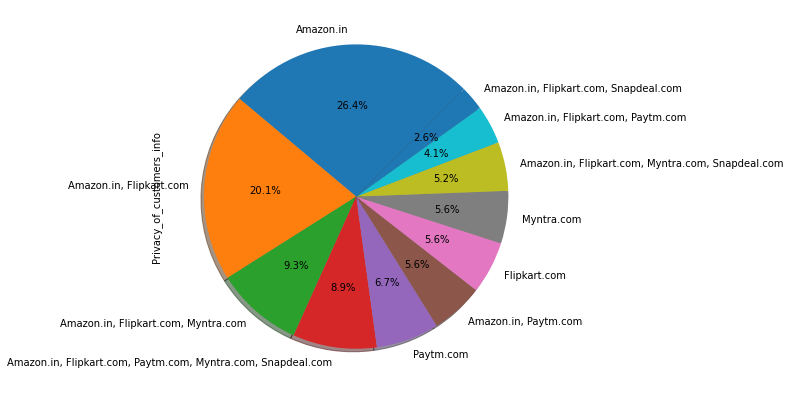

In [100]:
plt.figure(figsize=(15,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['Privacy_of_customers_info'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=True,)


Information of customers should always be secured and privacy for the same should be maintained by the website as these are the private information of customers which may lead them to fall in some trap if leaked out or misused by someone. This is one of the important aspect which every online retailers should focus on. Again amazon individually if we consider is having 26.4% of customers who believe on this site. 

In [101]:
df['Security_of_customer_financial_information'].value_counts()

Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Paytm.com                                                       15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Security_of_customer_financial_information, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Myntra.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(4, 0, 'Paytm.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(6, 0, 'Flipkart.com'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(8, 0, 'Amazon.in, Flipkart.com'),
  Text(9, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(10, 0, 'Amazon.in, Snapdeal.com')])

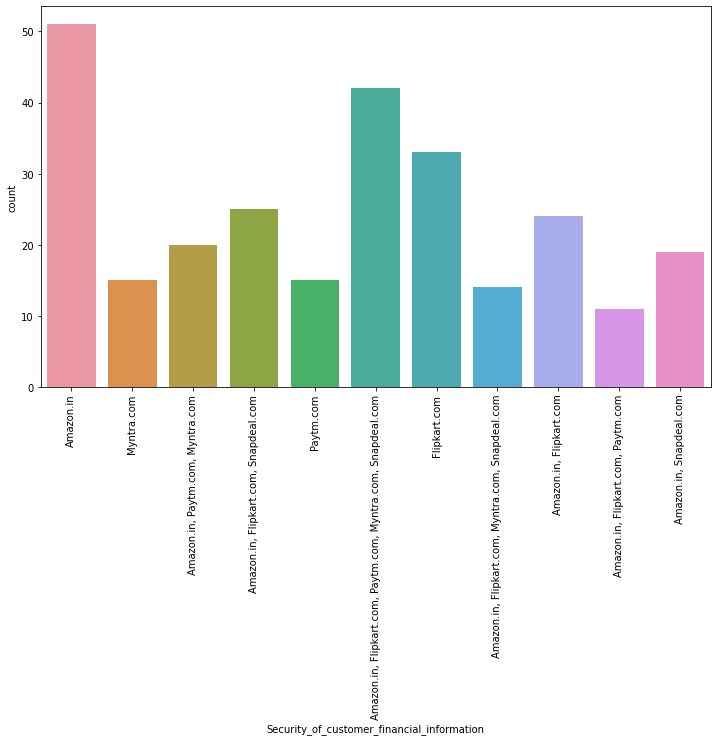

In [102]:
plt.figure(figsize=(12,7))
sns.countplot(df['Security_of_customer_financial_information'])
plt.xticks(rotation=90)

<AxesSubplot:ylabel='Security_of_customer_financial_information'>

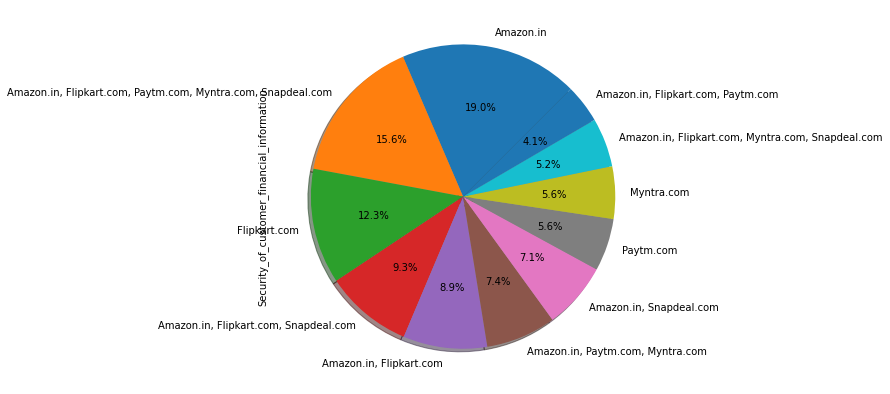

In [103]:
plt.figure(figsize=(15,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['Security_of_customer_financial_information'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=True,)


Information provided during payment time should be kept private by every website as these are the very crucial information which if leaked may lead a customer loosing their hard money by any of the fraud. Individually we can analyse through pie chart that amazon is having 19% of customers who believes to be safe with this website, rest 5.6% each given to paytm and Myntra that means these three sites individually do have customer base who trust them respectively.

In [104]:
df['Perceived_Trustworthiness'].value_counts()

Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived_Trustworthiness, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Myntra.com'),
  Text(2, 0, 'Amazon.in, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in, Flipkart.com'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

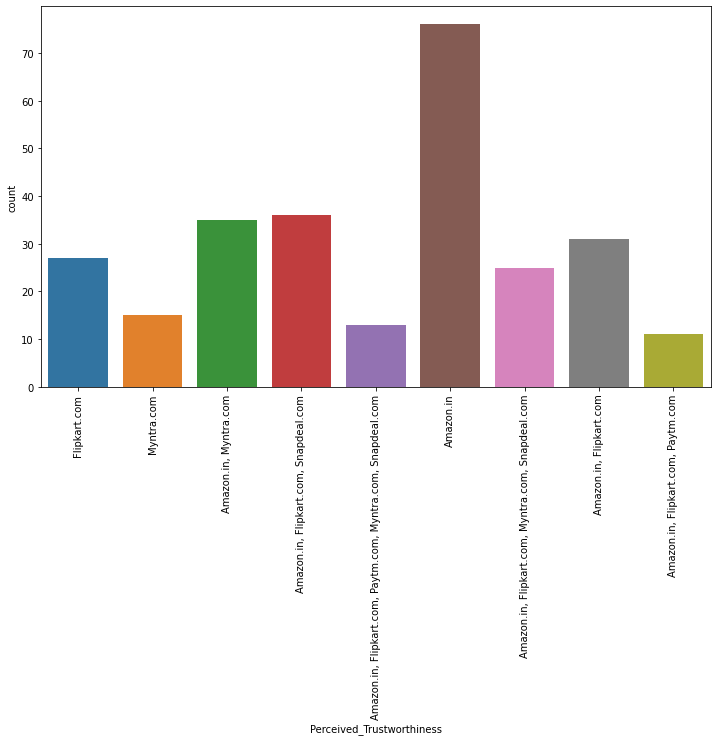

In [105]:
plt.figure(figsize=(12,7))
sns.countplot(df['Perceived_Trustworthiness'])
plt.xticks(rotation=90)

<AxesSubplot:ylabel='Perceived_Trustworthiness'>

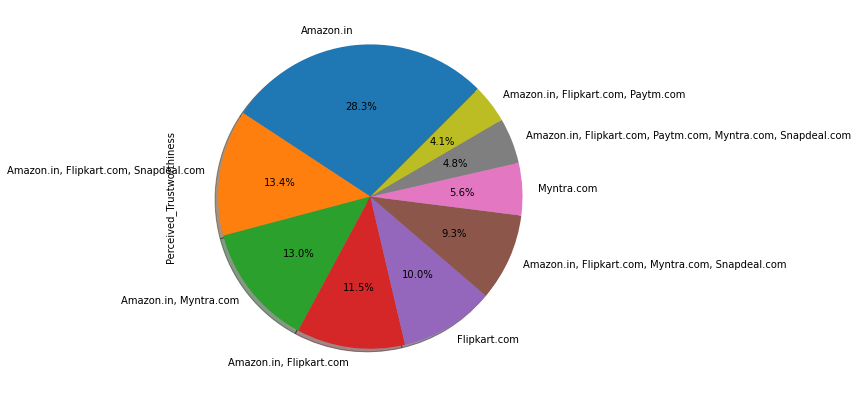

In [106]:
plt.figure(figsize=(15,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['Perceived_Trustworthiness'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=True,)


Trustful site we can see here is amazon with the help of piechart, as amazon is having 28.3%  of customers who believes shopping from this site are reliable and safe.

In [107]:
df['online_assistance_through_multi-channel'].value_counts()

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: online_assistance_through_multi-channel, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com'),
  Text(2, 0, 'Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal'),
  Text(4, 0, 'Amazon.in, Myntra.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(6, 0, 'Amazon.in'),
  Text(7, 0, 'Amazon.in, Flipkart.com'),
  Text(8, 0, 'Amazon.in, Snapdeal'),
  Text(9, 0, 'Flipkart.com')])

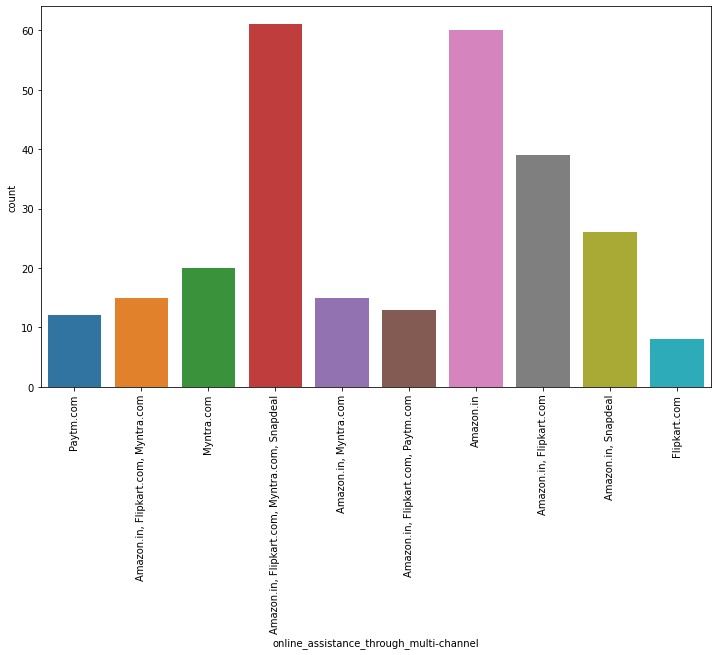

In [108]:
plt.figure(figsize=(12,7))
sns.countplot(df['online_assistance_through_multi-channel'])
plt.xticks(rotation=90)

<AxesSubplot:ylabel='online_assistance_through_multi-channel'>

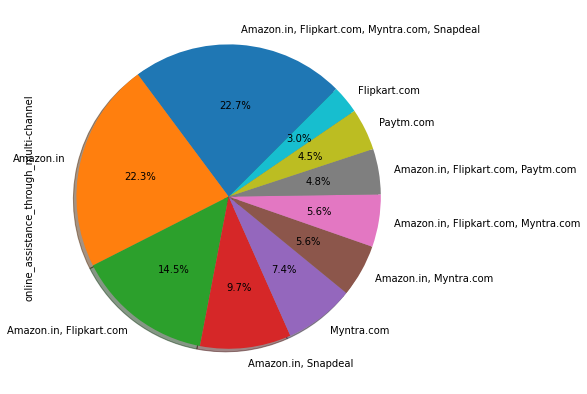

In [109]:
plt.figure(figsize=(15,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['online_assistance_through_multi-channel'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=True,)


As we seen in previous survey that most of the customers were agreeing to have multi channel for support or assistance. Here what we came across is Amazon do have that service which attracts customers to trust them more than others as if any customer do face any issues they definitely want help on time so that it get resolved. This not only gains the trust of customer but also gain their priority for their website. 

In [110]:
df['time_to_get_logged_in'].value_counts()

Amazon.in                                57
Amazon.in, Flipkart.com                  38
Paytm.com                                38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: time_to_get_logged_in, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Amazon.in, Flipkart.com'),
  Text(2, 0, 'Myntra.com'),
  Text(3, 0, 'Snapdeal.com'),
  Text(4, 0, 'Flipkart.com, Paytm.com'),
  Text(5, 0, 'Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Paytm.com'),
  Text(8, 0, 'Amazon.in, Paytm.com'),
  Text(9, 0, 'Flipkart.com')])

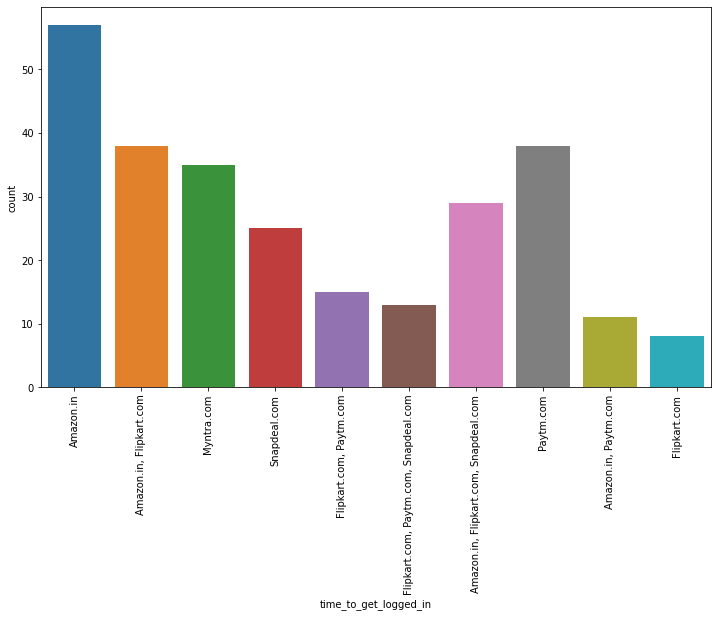

In [111]:
plt.figure(figsize=(12,7))
sns.countplot(df['time_to_get_logged_in'])
plt.xticks(rotation=90)

<AxesSubplot:ylabel='time_to_get_logged_in'>

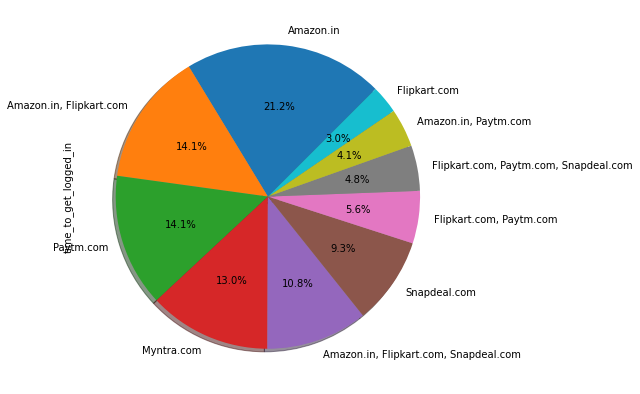

In [112]:
plt.figure(figsize=(15,12))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['time_to_get_logged_in'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=45, shadow=True,)


21.2% customer agree that amazon do have better log in time. That means this site takes less time to get logged in and in rating also we analysed that most  of the  customer given to this parameter 4 and 5 that means site should be more faster and less time consuming while trying to reach the page. Snapdeal is in second position with 9.3% of customer who agree that this site takes less time to get logged in. 

In [113]:
df['time_taking_in_displaying_graphics_photos'].value_counts()

Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: time_taking_in_displaying_graphics_photos, dtype: int64

<AxesSubplot:ylabel='time_taking_in_displaying_graphics_photos'>

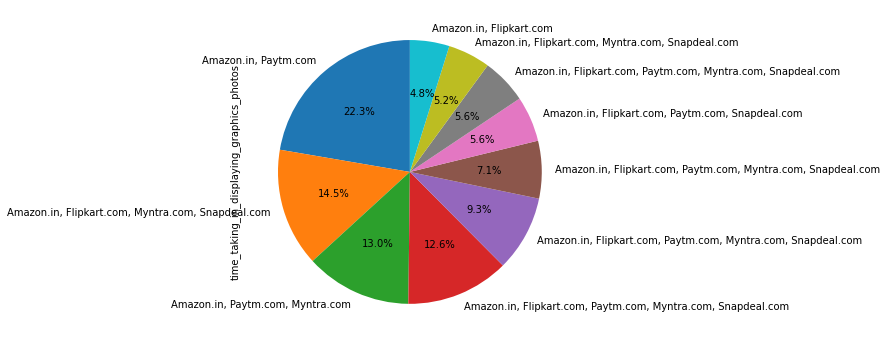

In [115]:
plt.figure(figsize=(13,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['time_taking_in_displaying_graphics_photos'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels= df['prefered_online_retailers'],
                                                legend = False,ax = ax1,startangle=90, shadow=False,)

Here none of the site has been given individual importance for having display of graphics and photos taking time. As we can see from above piechart that amazon and paytm together are having 22.3% of customers who agrees that these sites takes less time to display photos and graphics followed by amazon,flipkart,myntra and snap deal having 14.5%. As we know that there are lot many data and photos due to which these sites takes time to get open. And all the time information or product gets updated due to which sometimes it gets delayed.

In [116]:
df['delay_in_declaration_in_sales'].value_counts()

Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Amazon.in                  38
Flipkart.com               38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: delay_in_declaration_in_sales, dtype: int64

<AxesSubplot:ylabel='delay_in_declaration_in_sales'>

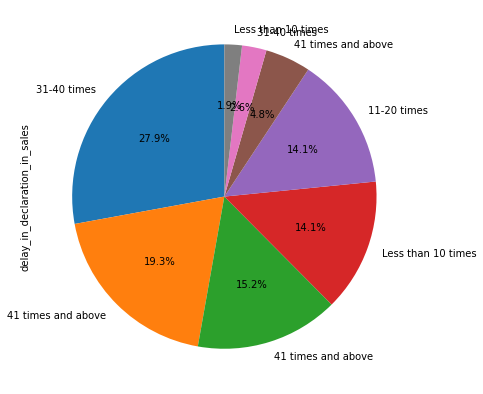

In [117]:
plt.figure(figsize=(15,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['delay_in_declaration_in_sales'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels= df['No_of_times_online_purchase'],
                                                legend = False,ax = ax1,startangle=90, shadow=False,)

Sales offer which most of the customer wait for if get delayed by any of the site and buyers get better offer from other site, they may turn to that site which may lead to churn of customer and sometimes regular customer do also attracts by the offer given by other sites which they were looking for. So this is important to announce any sales offer on time so that churning of customer can be curbed. With the help of piechart we came across that almost 31-40 times customer turned to some other website by seeing the offers just to grab that. This number of customer attrition are not tolerable for any of the online retailers as 27.9% customers they loosed 31-40 times followed by 41 times with 19.3% of customer just because of delay in announcing their sales offer.

In [118]:
df['delay_in_page_loading'].value_counts()

Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: delay_in_page_loading, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Snapdeal.com'),
  Text(2, 0, 'Myntra.com'),
  Text(3, 0, 'Paytm.com'),
  Text(4, 0, 'Amazon.in, Paytm.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Snapdeal.com'),
  Text(7, 0, 'Flipkart.com, Snapdeal.com'),
  Text(8, 0, 'Paytm.com, Snapdeal.com'),
  Text(9, 0, 'Amazon.in'),
  Text(10, 0, 'Amazon.in, Paytm.com, Myntra.com')])

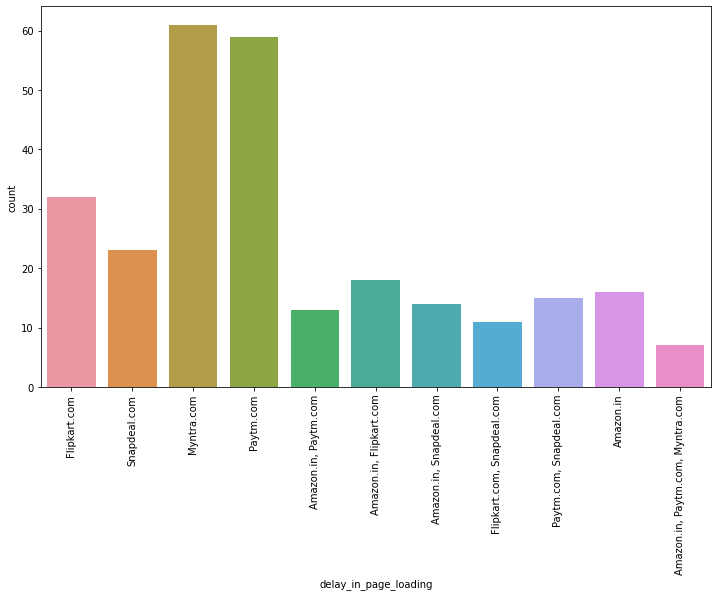

In [119]:
plt.figure(figsize=(12,7))
sns.countplot(df['delay_in_page_loading'])
plt.xticks(rotation=90)

<AxesSubplot:ylabel='delay_in_page_loading'>

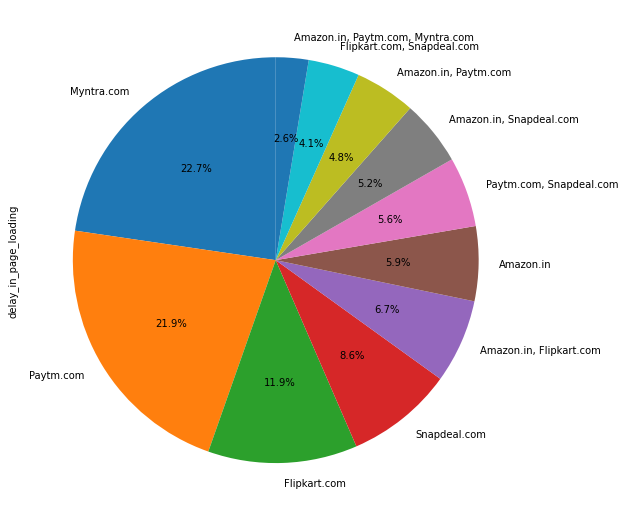

In [120]:
plt.figure(figsize=(20,14))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['delay_in_page_loading'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)

Most of the customer agrees that Myntra with 22.7% and paytm with 21.9% very less margin of difference between two are taking time while loading page . While amazon is having very less margin of customer with 5.9% who says that this site takes time to load page. 

In [121]:
df['limited_mode_of_payment_for_max_product'].value_counts()

Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: limited_mode_of_payment_for_max_product, dtype: int64

<AxesSubplot:ylabel='limited_mode_of_payment_for_max_product'>

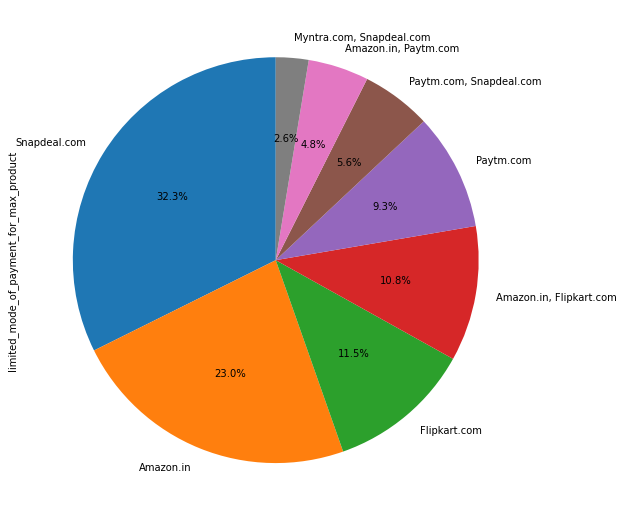

In [122]:
plt.figure(figsize=(20,14))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['limited_mode_of_payment_for_max_product'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)

Snapdeal having 32.3% of buyers who agrees that this site do have restriction in mode of payment for maximum product. This may be one of the reason that most of the customer does not prefer this site as much as amazon, Flipkart or Myntra. Even for Amazon we can see that 23% of customers do agree that this site is having limited mode of payment for maximum product.

In [123]:
df['Longer_delivery_period'].value_counts()

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Longer_delivery_period, dtype: int64

<AxesSubplot:ylabel='Longer_delivery_period'>

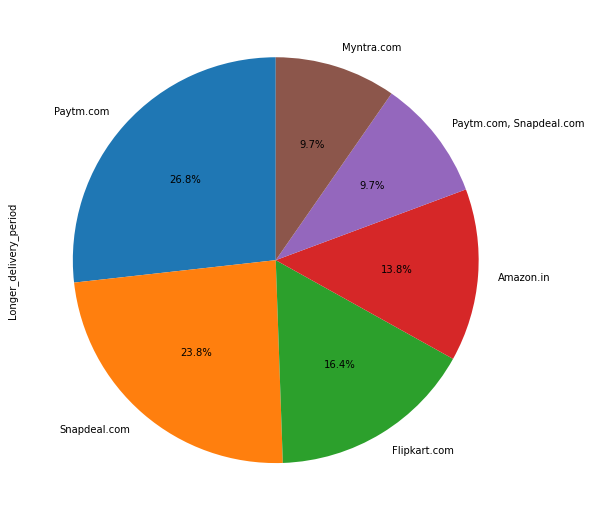

In [124]:
plt.figure(figsize=(20,14))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['Longer_delivery_period'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)

Paytm has been considered as taking long time to deliver the product as 26.8% of customer agree to this followed by snapdeal fo which 23.8% of customer agreed. This may also be one of the reason for attrition of customer.

In [125]:
df['change_in_website_design'].value_counts()

Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: change_in_website_design, dtype: int64

<AxesSubplot:ylabel='change_in_website_design'>

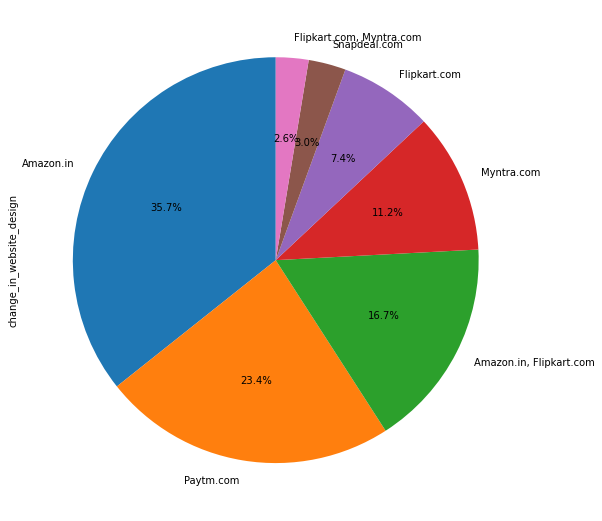

In [126]:
plt.figure(figsize=(20,14))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['change_in_website_design'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)

With the help of piechart we get the insight that amazon is the one who changes their website mostly as 36% customer agreed to this followed by paytm with 23.4%. This may sometimes be positive and sometimes become negative because people may get confuse of using new changes in website, so changes should be crystal clear which does not bother their customer.

In [127]:
df['disturbance_moving_from_one_page_to_another'].value_counts()

Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: disturbance_moving_from_one_page_to_another, dtype: int64

<AxesSubplot:ylabel='disturbance_moving_from_one_page_to_another'>

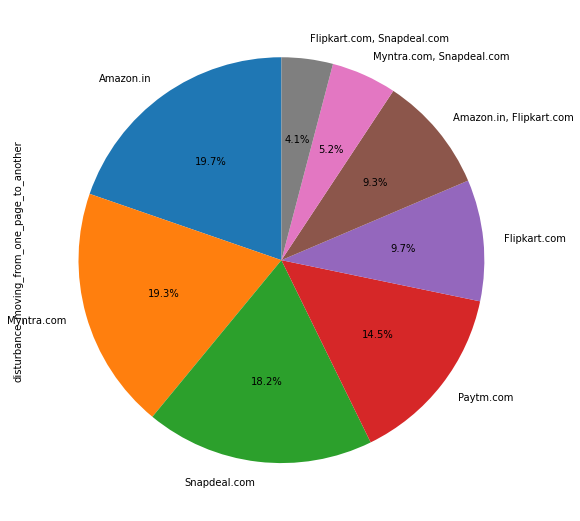

In [128]:
plt.figure(figsize=(20,14))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['disturbance_moving_from_one_page_to_another'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)

Sometimes due to site issue or server issue moving from one page to another takes lot many time which may irritate customer. And they may abandon the product without making final payment. And even will try to go some other site if having urgency . Here Myntra, Amazon, Snapdeal almost having same majority. Means most of the customer agree that moving from one page to another become difficult for these sites.

In [129]:
df['website_efficient_as_before'].value_counts()

Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: website_efficient_as_before, dtype: int64

<AxesSubplot:ylabel='website_efficient_as_before'>

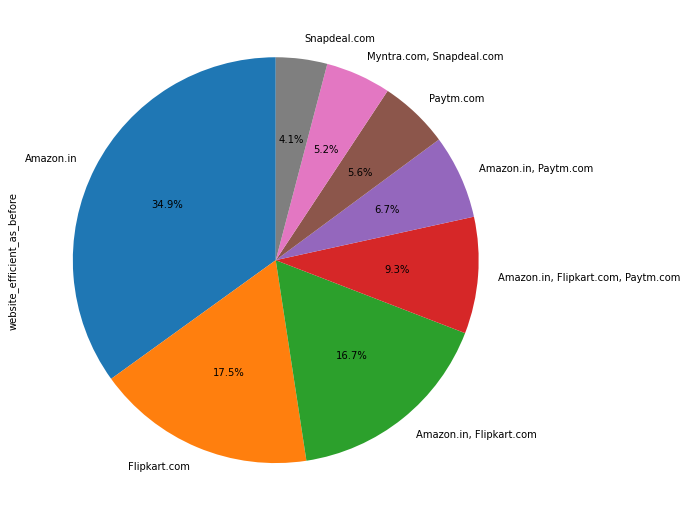

In [130]:
plt.figure(figsize=(20,14))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['website_efficient_as_before'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)

From above piechart get an insight that maximum % of customer i.e., 34.9% Agree that amazon website is as efficient as before followed by Flipkart with 17.5% . With the time most of the sites face some issues which become hurdle fo them and leads to attrition of customer, so updating the site really important for every online business.

In [131]:
df['recommendation_of_online_site_to_friend'].value_counts()

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: recommendation_of_online_site_to_friend, dtype: int64

<AxesSubplot:ylabel='recommendation_of_online_site_to_friend'>

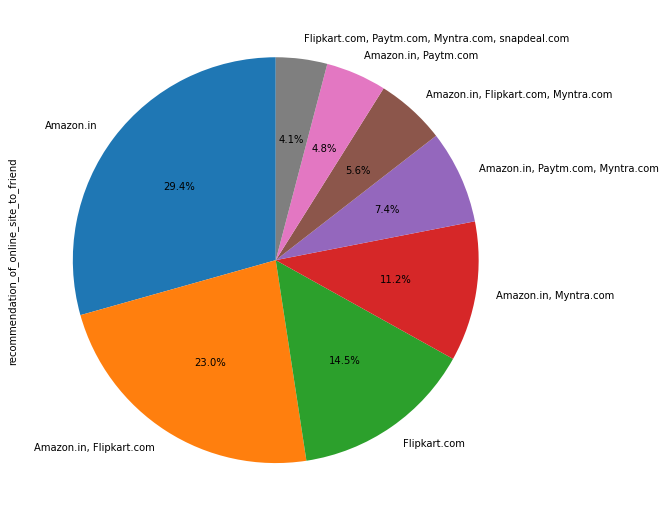

In [132]:
plt.figure(figsize=(20,14))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

df['recommendation_of_online_site_to_friend'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                                                legend = False,ax = ax1,startangle=90, shadow=False,)

Most of the customer recommending amazon to their friends with 29.4% as we analysed previously also that in most of the parameters amazon is really proven to be better site than others. Individually in second number we can see that Flipkart with 14.5 % recommended by customer . 

In [133]:
df.columns

Index(['Gender', 'Age', 'city_u_shop', 'Pincode',
       'time_period_shopping_online', 'No_of_times_online_purchase',
       'mode_of_access_online', 'device_used', 'screen_size_of_mobile',
       'operating_system', 'browser_used', 'channel_to_arrive_online',
       'source_to_reach_online_store', 'explore_e-retil_store',
       'preferred_payment_option', 'abandon_product_without_purchase',
       'reason_to_abandon', 'content_easytoread_understand',
       'similar_product_highlight_for_comparison',
       'complete_info_on_listed_seller_andproduct',
       'info_be_clear_on_listed_product', 'Ease_of_navigation_in_website',
       'Loading_and_processing_speed',
       'User_friendly_Interface_of_the_website', 'Convenient_Payment_methods',
       'trust_fulfill_transaction_stipulatedtime', 'empathy_and_query_solving',
       'guarantee_privacy_of_cust',
       'several_channel_communication_for_customer',
       'benefit_discount_by_online_shopping', 'enjoyment_shopping_by_online',

## Feature Engineering

As almost all the columns except pincode is in object form so need to change the same to integer form as machine algorith doesn't understand object data type.

In [134]:
le = LabelEncoder()

In [147]:
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})

In [150]:
df1 = le.fit_transform(df['Age'])
df['Age']=df1

In [154]:
df2 = le.fit_transform(df['city_u_shop'])
df['city_u_shop']=df2
df3 = le.fit_transform(df['time_period_shopping_online'])
df['time_period_shopping_online'] = df3
df4 = le.fit_transform(df['No_of_times_online_purchase'])
df['No_of_times_online_purchase'] = df4
df5 = le.fit_transform(df['mode_of_access_online'])
df['mode_of_access_online']=df5
df6 = le.fit_transform(df['device_used'])
df['device_used'] = df6
df7 = le.fit_transform(df['screen_size_of_mobile'])
df['screen_size_of_mobile'] = df7
df8 = le.fit_transform(df['operating_system'])
df['operating_system'] = df8
df9 = le.fit_transform(df['browser_used'])
df['browser_used'] = df9
df10 = le.fit_transform(df['channel_to_arrive_online'])
df['channel_to_arrive_online'] = df10
df11 = le.fit_transform(df['source_to_reach_online_store'])
df['source_to_reach_online_store'] = df11
df12 = le.fit_transform(df['explore_e-retil_store'])
df['explore_e-retil_store'] = df12
df13 = le.fit_transform(df['preferred_payment_option'])
df['preferred_payment_option'] = df13
df14 = le.fit_transform(df['abandon_product_without_purchase'])
df['abandon_product_without_purchase'] = df14
df15 = le.fit_transform(df['reason_to_abandon'])
df['reason_to_abandon'] = df15
df16 = le.fit_transform(df['content_easytoread_understand'])
df['content_easytoread_understand'] = df16
df17 = le.fit_transform(df['similar_product_highlight_for_comparison'])
df['similar_product_highlight_for_comparison'] = df17
df18 = le.fit_transform(df['complete_info_on_listed_seller_andproduct'])
df['complete_info_on_listed_seller_andproduct'] = df18
df19 = le.fit_transform(df['info_be_clear_on_listed_product'])
df['info_be_clear_on_listed_product']= df19
df20 = le.fit_transform(df['Ease_of_navigation_in_website'])
df['Ease_of_navigation_in_website'] = df20
df21 = le.fit_transform(df['Loading_and_processing_speed'])
df['Loading_and_processing_speed'] = df21
df22 = le.fit_transform(df['User_friendly_Interface_of_the_website'])
df['User_friendly_Interface_of_the_website'] = df22
df23 = le.fit_transform(df['Convenient_Payment_methods'])
df['Convenient_Payment_methods'] = df23
df24 = le.fit_transform(df['trust_fulfill_transaction_stipulatedtime'])
df['trust_fulfill_transaction_stipulatedtime'] = df24
df25 = le.fit_transform(df['empathy_and_query_solving'])
df['empathy_and_query_solving'] = df25
df26 = le.fit_transform(df['guarantee_privacy_of_cust'])
df['guarantee_privacy_of_cust'] = df26
df27 = le.fit_transform(df['several_channel_communication_for_customer'])
df['several_channel_communication_for_customer'] = df27
df28 = le.fit_transform(df['benefit_discount_by_online_shopping'])
df['benefit_discount_by_online_shopping'] = df28
df29 = le.fit_transform(df['enjoyment_shopping_by_online'])
df['enjoyment_shopping_by_online'] = df29
df30 = le.fit_transform(df['convenient_and_flexible'])
df['convenient_and_flexible']=df30
df31 = le.fit_transform(df['return_and_replacement_policy'])
df['return_and_replacement_policy'] = df31
df32 = le.fit_transform(df['benefit_by_loyalty'])
df['benefit_by_loyalty'] = df32
df33 = le.fit_transform(df['quality_info_satisfy_customer'])
df['quality_info_satisfy_customer'] = df33
df34 = le.fit_transform(df['good_quality_satisfaction_for_user'])
df['good_quality_satisfaction_for_user'] = df34
df35 = le.fit_transform(df['net_benefit_by_online_shopping_lead_satisfaction'])
df['net_benefit_by_online_shopping_lead_satisfaction'] = df35
df36 = le.fit_transform(df['trust_lead_user_satisfaction'])
df['trust_lead_user_satisfaction'] = df36
df37 = le.fit_transform(df['offers_wide_variety'])
df['offers_wide_variety'] = df37
df38 = le.fit_transform(df['complete_relevent_info_of_product'])
df['complete_relevent_info_of_product'] = df38
df39 = le.fit_transform(df['Monetary_savings'])
df['Monetary_savings'] = df39
df40 = le.fit_transform(df['Convenience_of_patronizing_the_online_retailer'])
df['Convenience_of_patronizing_the_online_retailer'] = df40
df41 = le.fit_transform(df['online_shopping_gives_sense_of_adventure'])
df['online_shopping_gives_sense_of_adventure'] = df41
df42 = le.fit_transform(df['enhance_social_status'])
df['enhance_social_status'] = df42
df43 = le.fit_transform(df['gratification_shopping_fav_e-tailer'])
df['gratification_shopping_fav_e-tailer'] = df43
df44 = le.fit_transform(df['shopping_online_fulfill_vertain_roles'])
df['shopping_online_fulfill_vertain_roles'] = df44
df45 = le.fit_transform(df['value_for_money_spent'])
df['value_for_money_spent'] = df45


In [156]:
df46 = le.fit_transform(df['prefered_online_retailers'])
df['prefered_online_retailers'] = df46
df47 = le.fit_transform(df['Easy_to_use_website_or_application'])
df['Easy_to_use_website_or_application'] = df47
df48 = le.fit_transform(df['Visual_appealing_web-page_layout'])
df['Visual_appealing_web-page_layout'] = df48
df49 = le.fit_transform(df['Wild variety of product on offer'])
df['Wild variety of product on offer']=df49
df50 = le.fit_transform(df['complete_info_of_products'])
df['complete_info_of_products'] = df50
df51 = le.fit_transform(df['Fast_loading_website_speed'])
df['Fast_loading_website_speed'] = df51
df52 = le.fit_transform(df['reliability_of_website_app'])
df['reliability_of_website_app'] = df52
df53 = le.fit_transform(df['Quickness_to_complete_purchase'])
df['Quickness_to_complete_purchase'] = df53
df54 = le.fit_transform(df['several_payment_options'])
df['several_payment_options'] = df54
df55 = le.fit_transform(df['Speedy_order_delivery'])
df['Speedy_order_delivery'] = df55
df56 = le.fit_transform(df['Privacy_of_customers_info'])
df['Privacy_of_customers_info'] = df56
df57 = le.fit_transform(df['Security_of_customer_financial_information'])
df['Security_of_customer_financial_information'] = df57
df58 = le.fit_transform(df['Perceived_Trustworthiness'])
df['Perceived_Trustworthiness'] = df58
df59 = le.fit_transform(df['online_assistance_through_multi-channel'])
df['online_assistance_through_multi-channel'] = df59
df60 = le.fit_transform(df['time_to_get_logged_in'])
df['time_to_get_logged_in'] = df60
df61 = le.fit_transform(df['time_taking_in_displaying_graphics_photos'])
df['time_taking_in_displaying_graphics_photos'] = df61
df62 = le.fit_transform(df['delay_in_declaration_in_sales'])
df['delay_in_declaration_in_sales'] = df62
df63 = le.fit_transform(df['delay_in_page_loading'])
df['delay_in_page_loading'] = df63
df64 = le.fit_transform(df['limited_mode_of_payment_for_max_product'])
df['limited_mode_of_payment_for_max_product'] = df64
df65 = le.fit_transform(df['Longer_delivery_period'])
df['Longer_delivery_period']= df65
df66 = le.fit_transform(df['change_in_website_design'])
df['change_in_website_design'] = df66
df67 = le.fit_transform(df['disturbance_moving_from_one_page_to_another'])
df['disturbance_moving_from_one_page_to_another'] = df67
df68 = le.fit_transform(df['website_efficient_as_before'])
df['website_efficient_as_before'] = df68
df69 = le.fit_transform(df['recommendation_of_online_site_to_friend'])
df['recommendation_of_online_site_to_friend'] = df69

In [157]:
df.head()

,Gender,Age,city_u_shop,Pincode,time_period_shopping_online,No_of_times_online_purchase,mode_of_access_online,device_used,screen_size_of_mobile,operating_system,browser_used,channel_to_arrive_online,source_to_reach_online_store,explore_e-retil_store,preferred_payment_option,abandon_product_without_purchase,reason_to_abandon,content_easytoread_understand,similar_product_highlight_for_comparison,complete_info_on_listed_seller_andproduct,info_be_clear_on_listed_product,Ease_of_navigation_in_website,Loading_and_processing_speed,User_friendly_Interface_of_the_website,Convenient_Payment_methods,trust_fulfill_transaction_stipulatedtime,empathy_and_query_solving,guarantee_privacy_of_cust,several_channel_communication_for_customer,benefit_discount_by_online_shopping,enjoyment_shopping_by_online,convenient_and_flexible,return_and_replacement_policy,benefit_by_loyalty,quality_info_satisfy_customer,good_quality_satisfaction_for_user,net_benefit_by_online_shopping_lead_satisfaction,trust_lead_user_satisfaction,offers_wide_variety,complete_relevent_info_of_product,Monetary_savings,Convenience_of_patronizing_the_online_retailer,online_shopping_gives_sense_of_adventure,enhance_social_status,gratification_shopping_fav_e-tailer,shopping_online_fulfill_vertain_roles,value_for_money_spent,prefered_online_retailers,Easy_to_use_website_or_application,Visual_appealing_web-page_layout,Wild variety of product on offer,complete_info_of_products,Fast_loading_website_speed,reliability_of_website_app,Quickness_to_complete_purchase,several_payment_options,Speedy_order_delivery,Privacy_of_customers_info,Security_of_customer_financial_information,Perceived_Trustworthiness,online_assistance_through_multi-channel,time_to_get_logged_in,time_taking_in_displaying_graphics_photos,delay_in_declaration_in_sales,delay_in_page_loading,limited_mode_of_payment_for_max_product,Longer_delivery_period,change_in_website_design,disturbance_moving_from_one_page_to_another,website_efficient_as_before,recommendation_of_online_site_to_friend
0,1,1,2,110009,3,2,0,0,3,2,0,2,2,2,2,2,2,0,2,2,0,0,4,1,1,1,1,0,0,4,3,1,1,0,2,2,0,2,3,3,1,2,0,0,2,0,1,7,9,7,5,10,9,9,8,9,0,0,0,7,9,0,0,3,5,0,3,2,0,0,6
1,0,0,2,110030,3,3,3,2,0,1,0,2,4,4,1,3,4,2,3,3,2,2,3,3,2,2,1,1,1,2,2,2,2,2,1,2,2,2,2,2,2,2,4,4,2,2,1,2,3,5,6,2,2,8,2,2,1,9,9,8,2,1,6,7,10,7,5,0,4,1,3
2,0,0,4,201308,2,3,1,2,2,0,0,2,4,1,2,2,4,2,0,0,0,0,0,3,2,2,1,1,1,2,2,2,2,2,1,2,2,0,2,2,2,0,0,0,4,4,0,8,7,6,4,7,7,6,5,10,0,0,6,6,8,7,6,4,7,0,3,5,6,0,5
3,1,0,6,132001,2,5,1,2,2,1,3,2,2,2,1,1,0,0,0,2,0,2,0,3,2,0,1,1,0,0,4,3,0,4,2,0,3,0,0,0,2,0,0,2,0,4,0,4,4,3,1,1,6,3,3,2,3,2,5,5,3,9,7,4,8,5,3,1,1,2,1
4,0,0,0,530068,1,0,3,2,0,1,3,0,4,4,1,0,0,2,2,2,0,0,3,3,2,0,1,0,1,2,2,2,2,1,0,2,2,2,0,0,2,0,4,3,2,3,1,4,4,9,7,5,0,6,4,4,0,7,10,6,5,5,8,5,8,7,3,0,7,6,3


No need to treat skewness or outliers as we check skewness or outliers for continous columns , But here all columns except pincode were categorical column.

### Splitting x and y 

In [158]:
# Splitting Target and feature variable into x and y
x = df.drop(columns = ['recommendation_of_online_site_to_friend'])
y = df['recommendation_of_online_site_to_friend']

In [159]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[ 1.43416114, -0.2800127 , -0.78397694, ..., -0.08825722,
        -1.40519246, -0.98469733],
       [-0.69727172, -1.12634321, -0.78397694, ..., -1.0192844 ,
         0.16163354, -0.52322768],
       [-0.69727172, -1.12634321, -0.15539334, ...,  1.30828355,
         0.94504654, -0.98469733],
       ...,
       [-0.69727172,  0.56631782, -1.41256055, ...,  1.77379714,
         1.33675303, -0.98469733],
       [-0.69727172,  2.25897885,  1.73035746, ..., -1.0192844 ,
         0.55334004,  1.32265095],
       [-0.69727172,  0.56631782, -0.46968514, ..., -1.0192844 ,
        -1.40519246, -0.98469733]])

## Finding best random state

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [161]:
maxaccu = 0
maxrs = 0

for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state = i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy score is:",maxaccu,"On Random state: ",maxrs)

Best Accuracy score is: 1.0 On Random state:  4


In [162]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,random_state=i,test_size=0.30)

In [163]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred = DTC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        22
           2       0.86      1.00      0.92         6
           3       1.00      0.89      0.94         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         4

    accuracy                           0.99        81
   macro avg       0.98      0.99      0.98        81
weighted avg       0.99      0.99      0.99        81



In [164]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.9925925925925926


In [165]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred =RFC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         4

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



In [166]:
print(cross_val_score(RFC,x,y,cv=5).mean())

1.0


In [169]:
SV = SVC()
SV.fit(x_train,y_train)
pred = SV.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         4

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



In [170]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.30859538784067087


So here Randomforest Classifier is the best model giving 100% accuracy